# The Story of Wine

## Introduction

***Wine is the most healthful and most hygienic of beverages***
– Louis Pasteur

All over the world wine is so popular among people, and only 5% of the population doesn’t know what is wine? Sounds good.

It definitely comes across the fruit graphs, which is so sweet on the test but graphs are not just to eat, they are used to make different types of things. Wine is one of them Wine is an alcoholic drink that is made up of fermented grapes. It would be noticed that wine has also their type they are red and white wine this was because of different varieties of graphs.

The worldwide distribution of wine is 31 million tonnes which were huge in number.

What if thinking about the quality of wine, how can people differentiate the wine according to their quality? The big question arises.

According to experts, the wine is differentiated according to its smell, flavor, and color, but not everyone is a wine expert to say that wine is good or bad. What will people do then? Here’s the use of Machine Learning comes, yes using machine learning to check and predict wine quality. ML have some techniques that will be discussed below.

## Import Libraries and Load Dataset

In [1]:
import pickle
from matplotlib import rcParams
from warnings import filterwarnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost



In [2]:
filterwarnings(action='ignore')

In [3]:
white_wine_df = pd.read_csv('winequality-white.csv', sep=';', quotechar='"')
white_wine_df['type'] = 'white'
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [4]:
red_wine_df = pd.read_csv('winequality-red.csv', sep=';', quotechar='"')
red_wine_df['type'] = 'red'
red_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [5]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [6]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
wine_df = pd.concat([white_wine_df, red_wine_df])

## Understand the Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, it is not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [8]:
wine_df.shape

(6497, 13)

In [9]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

### Features

* Input variables (continuous variables based on physicochemical tests):

1. **fixed acidity:** The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g/dm<sup>3</sup>)

2. **volatile acidity:** Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g/dm<sup>3</sup>)

3. **citric acid:** Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g/dm<sup>3</sup>)

4. **residual sugar:** The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g/dm<sup>3</sup>)

5. **chlorides:** The amount of chloride salts (sodium chloride) present in the wine. (g/dm<sup>3</sup>)

6. **free sulfur dioxide:** The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg/dm<sup>3</sup>)

7. **total sulfur dioxide:** The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg/dm<sup>3</sup>)

8. **density:** The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g/cm<sup>3</sup>)

9. **pH:** A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)

10. **sulphates:** Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent. (g/dm<sup>3</sup>)

11. **alcohol:** How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% vol.)

12. **type:**  Type of wine (categorical: 'red', 'white')

* Output variable (based on sensory data): 

13. **quality:** The score between 0 (very bad) and 10 (very excellent) by wine experts

In [10]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [11]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

There are a total of **6,497 wines** with **13 features**. All of the features have no NaN values. Then there is no need of cleaning this dataset for analysis in the next section.

In [12]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [13]:
wine_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

## Exploratory Data Analysis

In [14]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [15]:
width = 20
height = 12
sns.set_theme(style='whitegrid',
              rc={'figure.figsize': (width, height),
                  'axes.titlesize': 32,
                  'axes.titleweight': 'bold',
                  'font.size': 24,
                  'font.weight': 'normal',
                  'xtick.labelsize': 24,
                  'ytick.labelsize': 24,
                  'figure.autolayout': True,
                  'figure.titlesize': 32,
                  'figure.titleweight': 'bold',
                  })

In [16]:
class CountPlot:
    def __init__(self, data, feature, xticks_step=None):
        self.data = data
        self.feature = feature
        self.xticks_step = xticks_step

    def new_xticks(self, fig):
        xticks_list = [i.get_text() for i in fig.get_xticklabels()]
        xticks = [round(float(i), 3) for i in xticks_list]
        plt.xticks(range(0, len(xticks), self.xticks_step), xticks[::self.xticks_step])

    def plot_countplot(self):
        fig = sns.countplot(self.data, x=self.feature,
                            palette='Set3')
        
        if self.xticks_step != None:
            self.new_xticks(fig)

        plt.title('Number of wine in {}'.format(self.feature))
        plt.xlabel('{}'.format(self.feature.title()))
        plt.ylabel('Count')
        plt.savefig('image_result/{}_count.png'.format(self.feature.replace(' ', '_')))

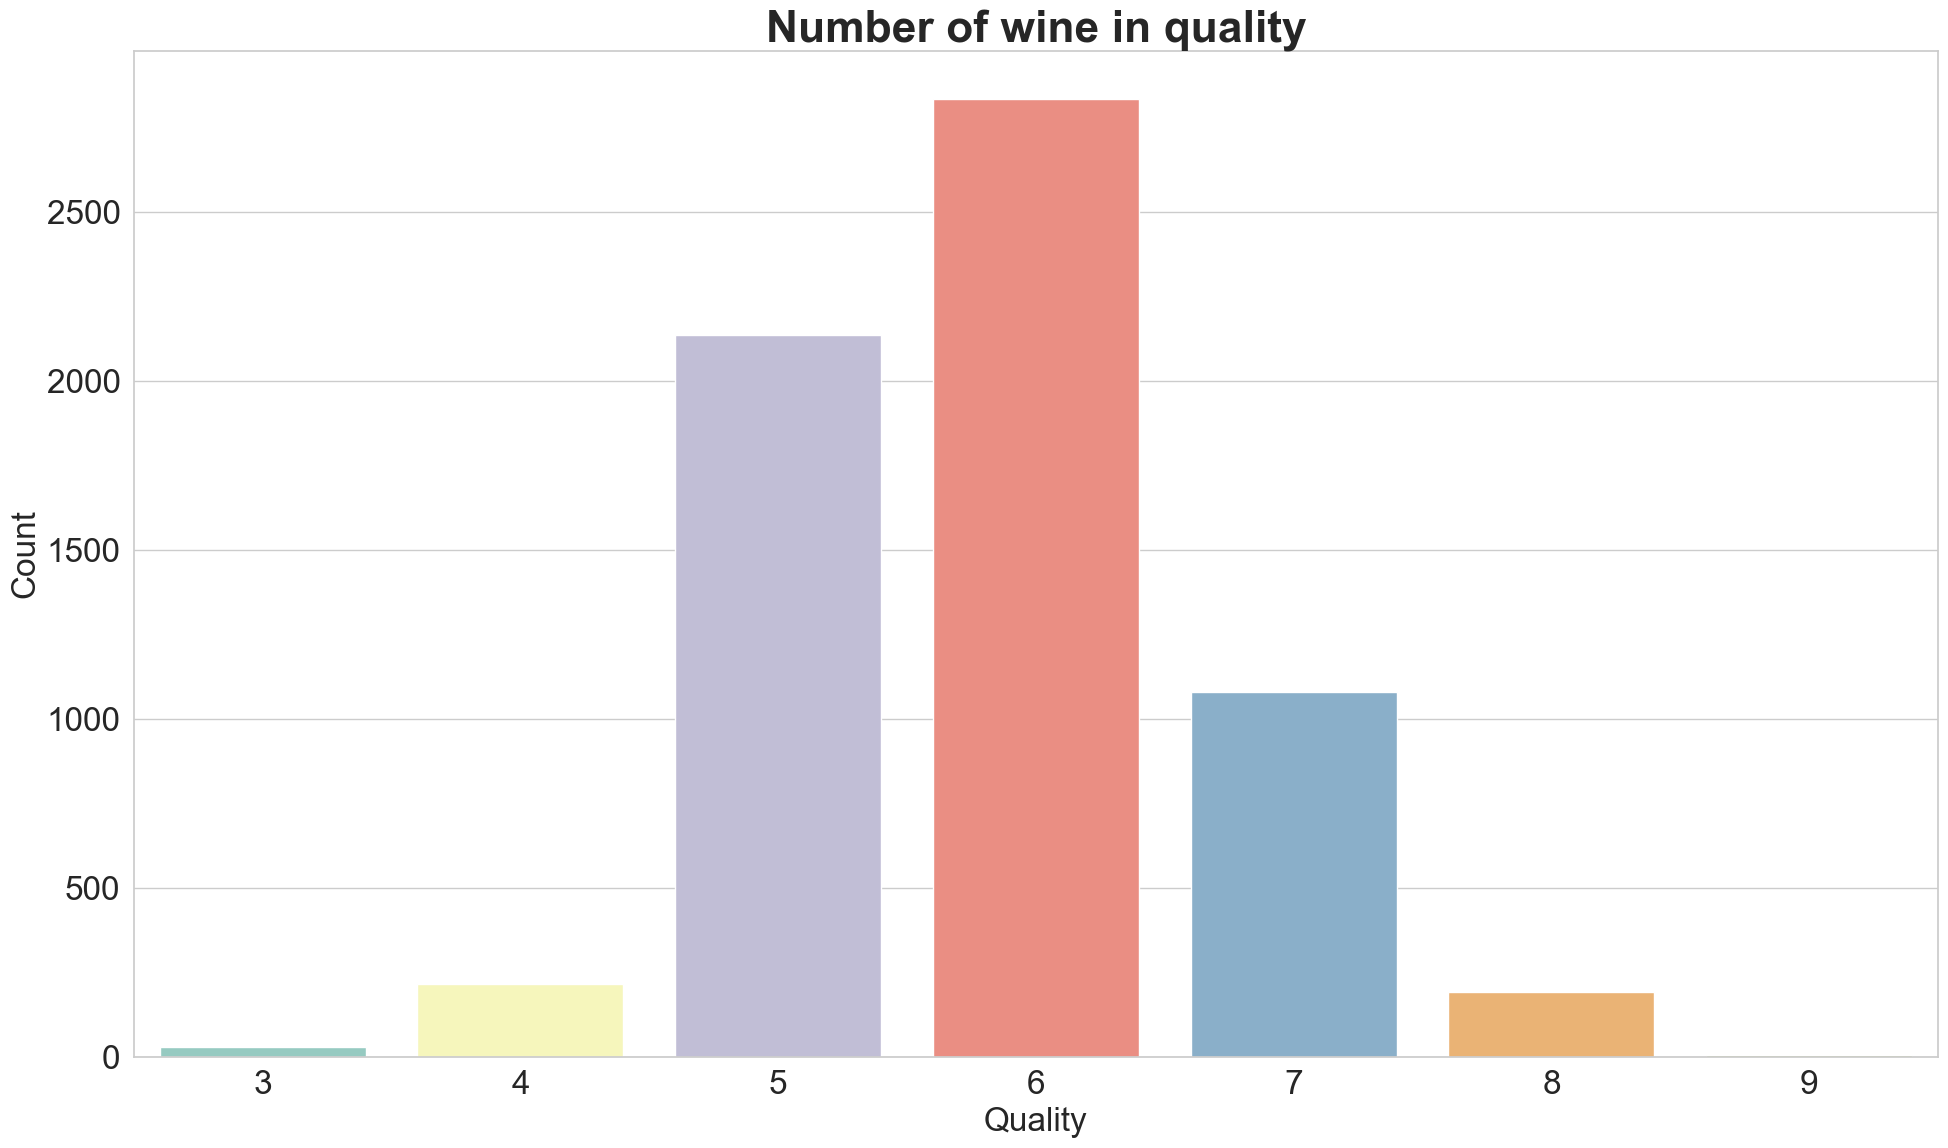

In [17]:
quality = CountPlot(wine_df, 'quality')
quality.plot_countplot()

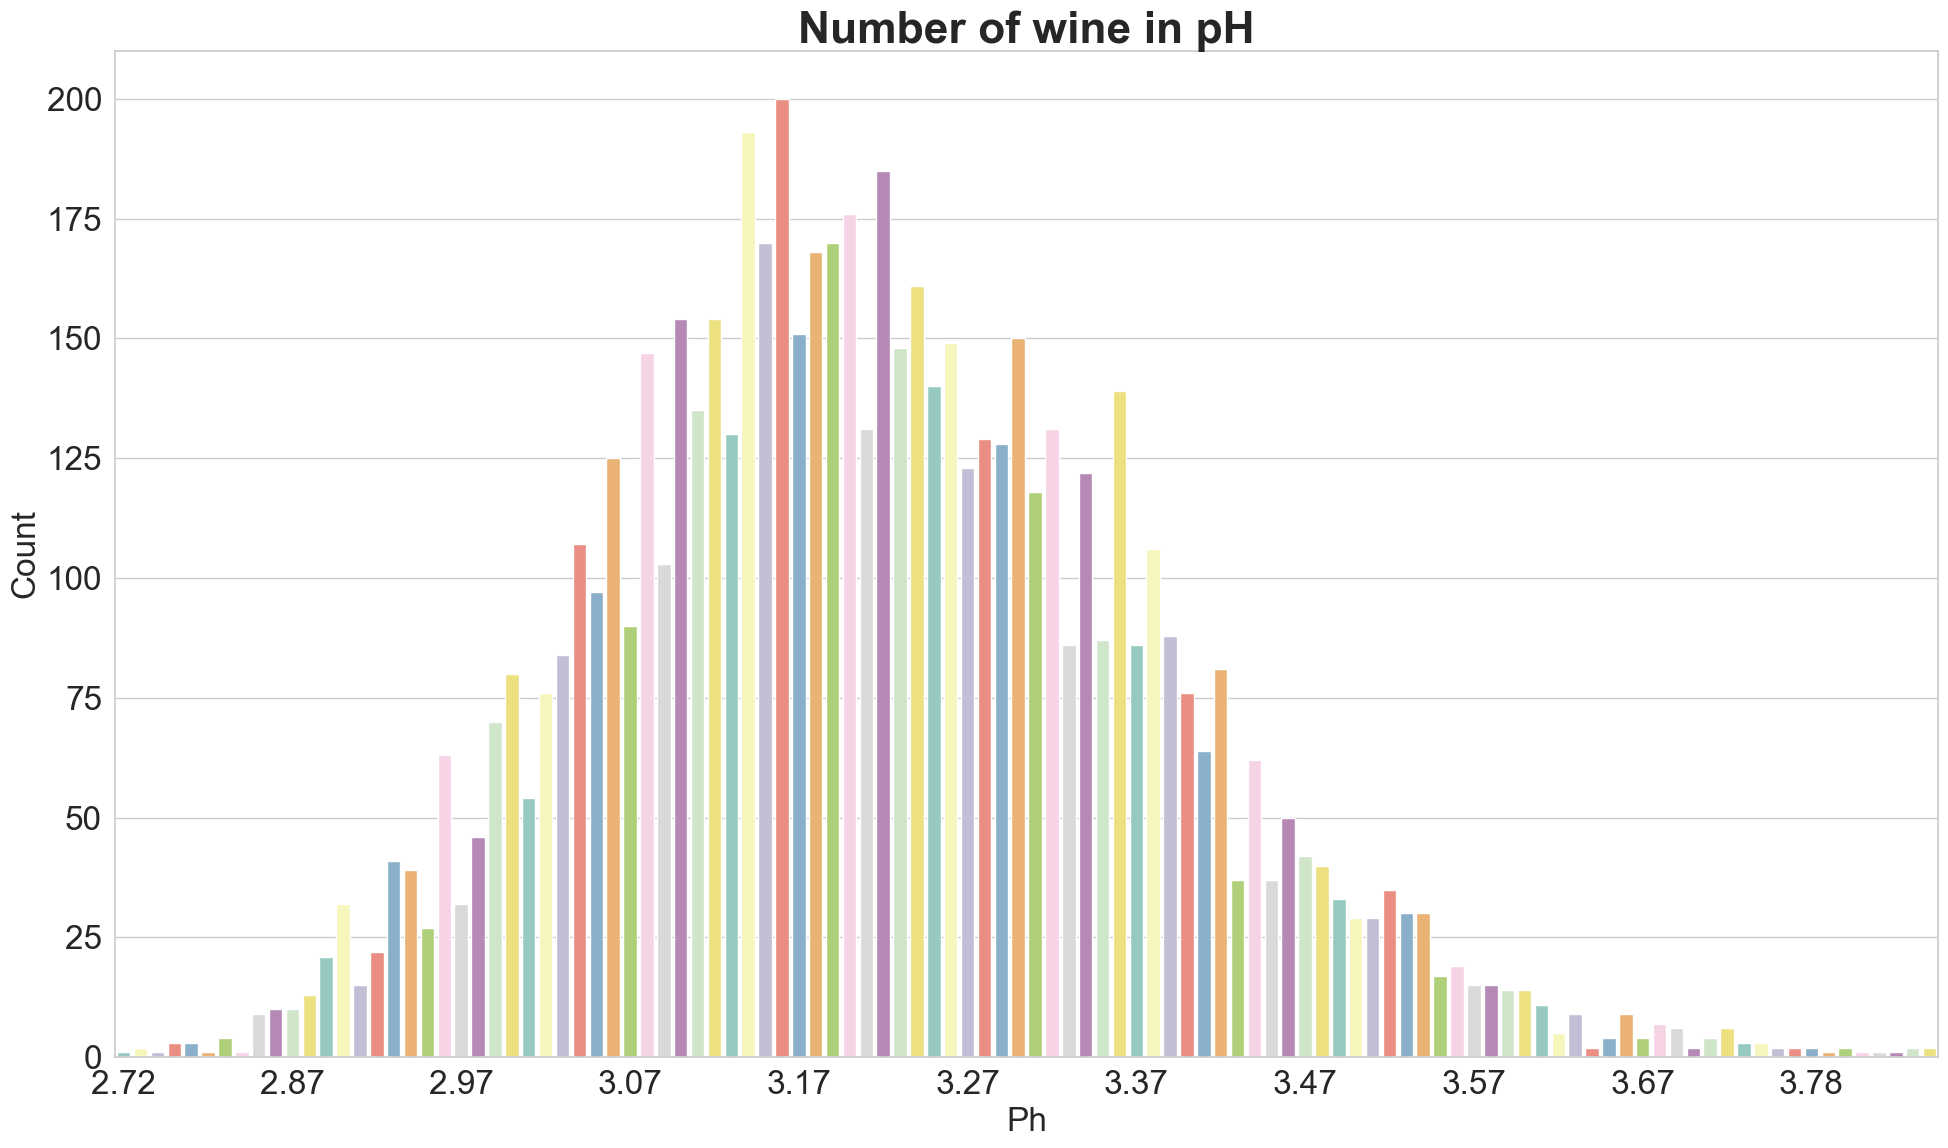

In [18]:
pH = CountPlot(wine_df, 'pH', xticks_step=10)
pH.plot_countplot()

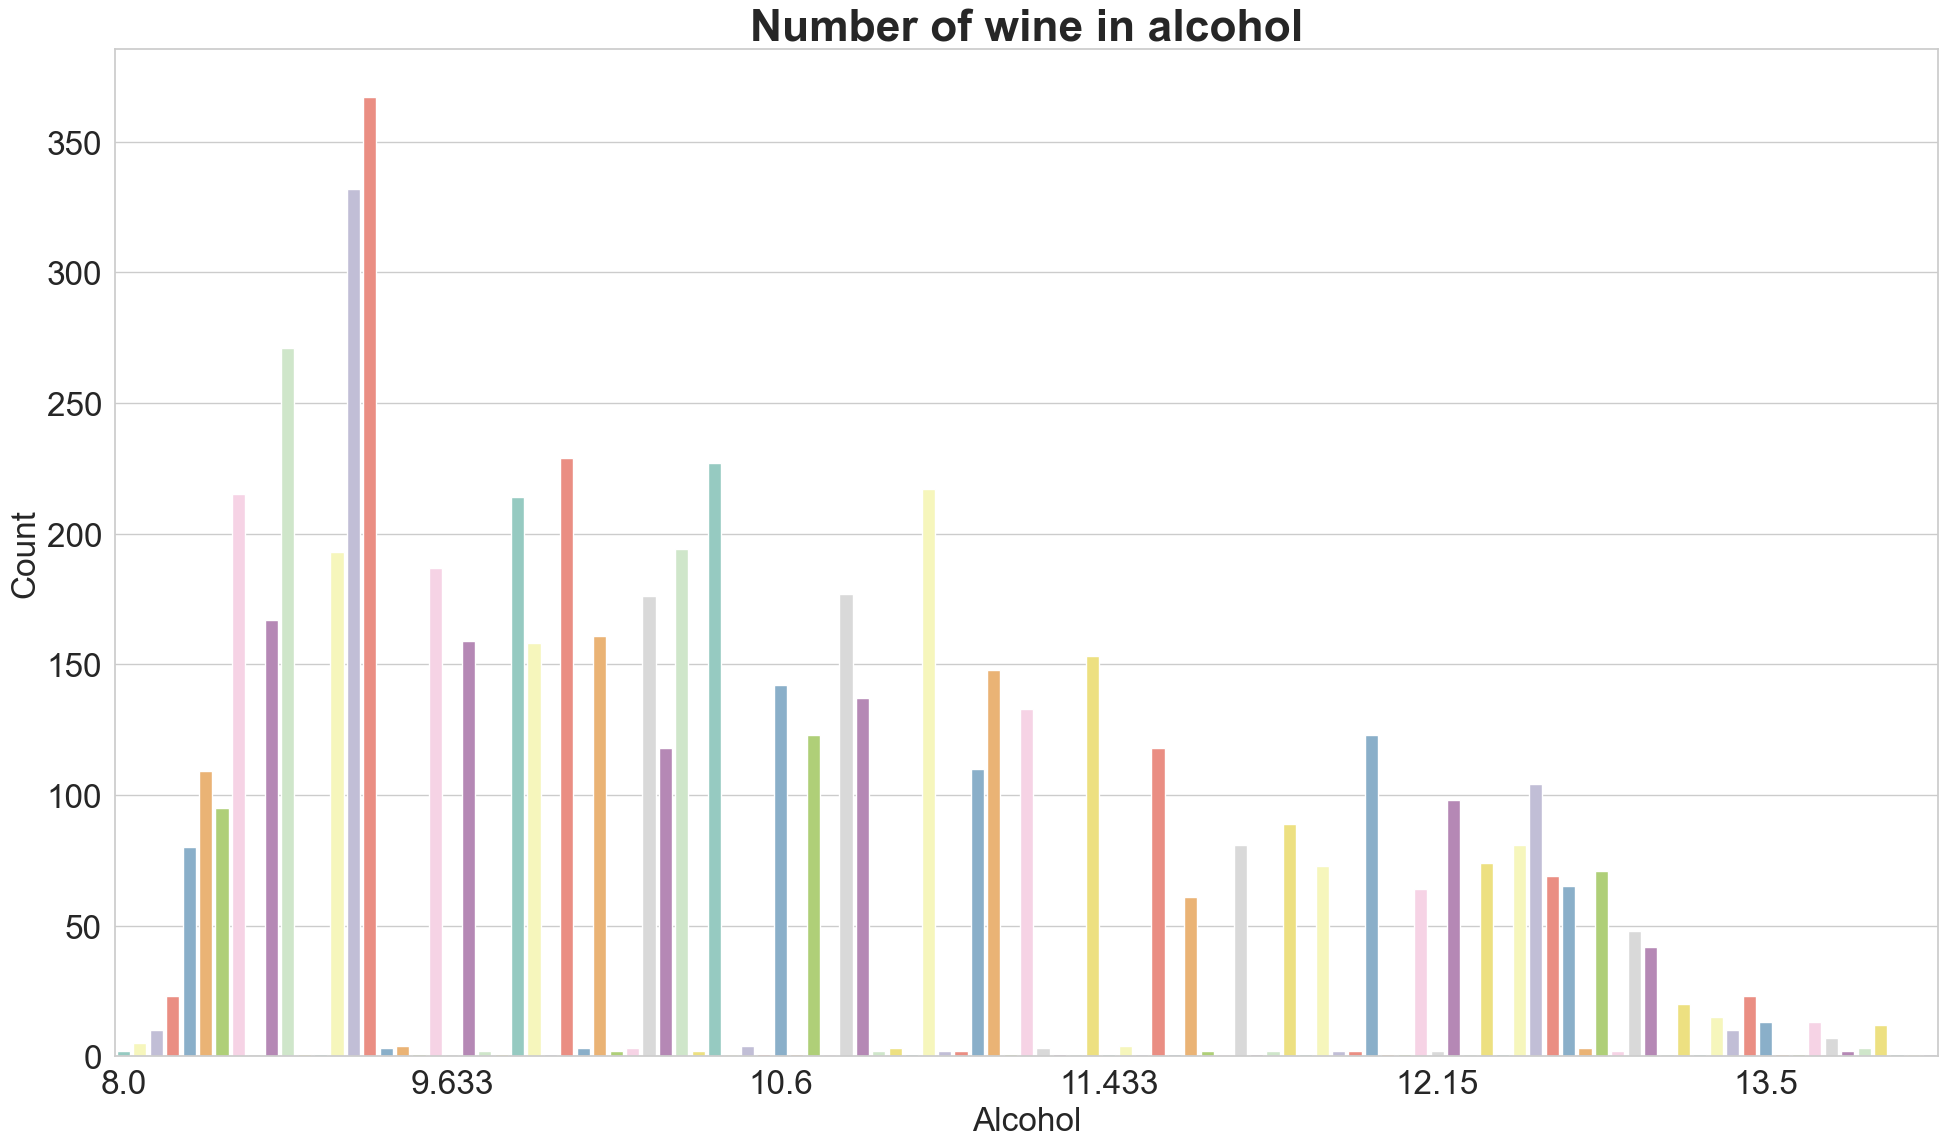

In [19]:
alcohol = CountPlot(wine_df, 'alcohol', xticks_step=20)
alcohol.plot_countplot()

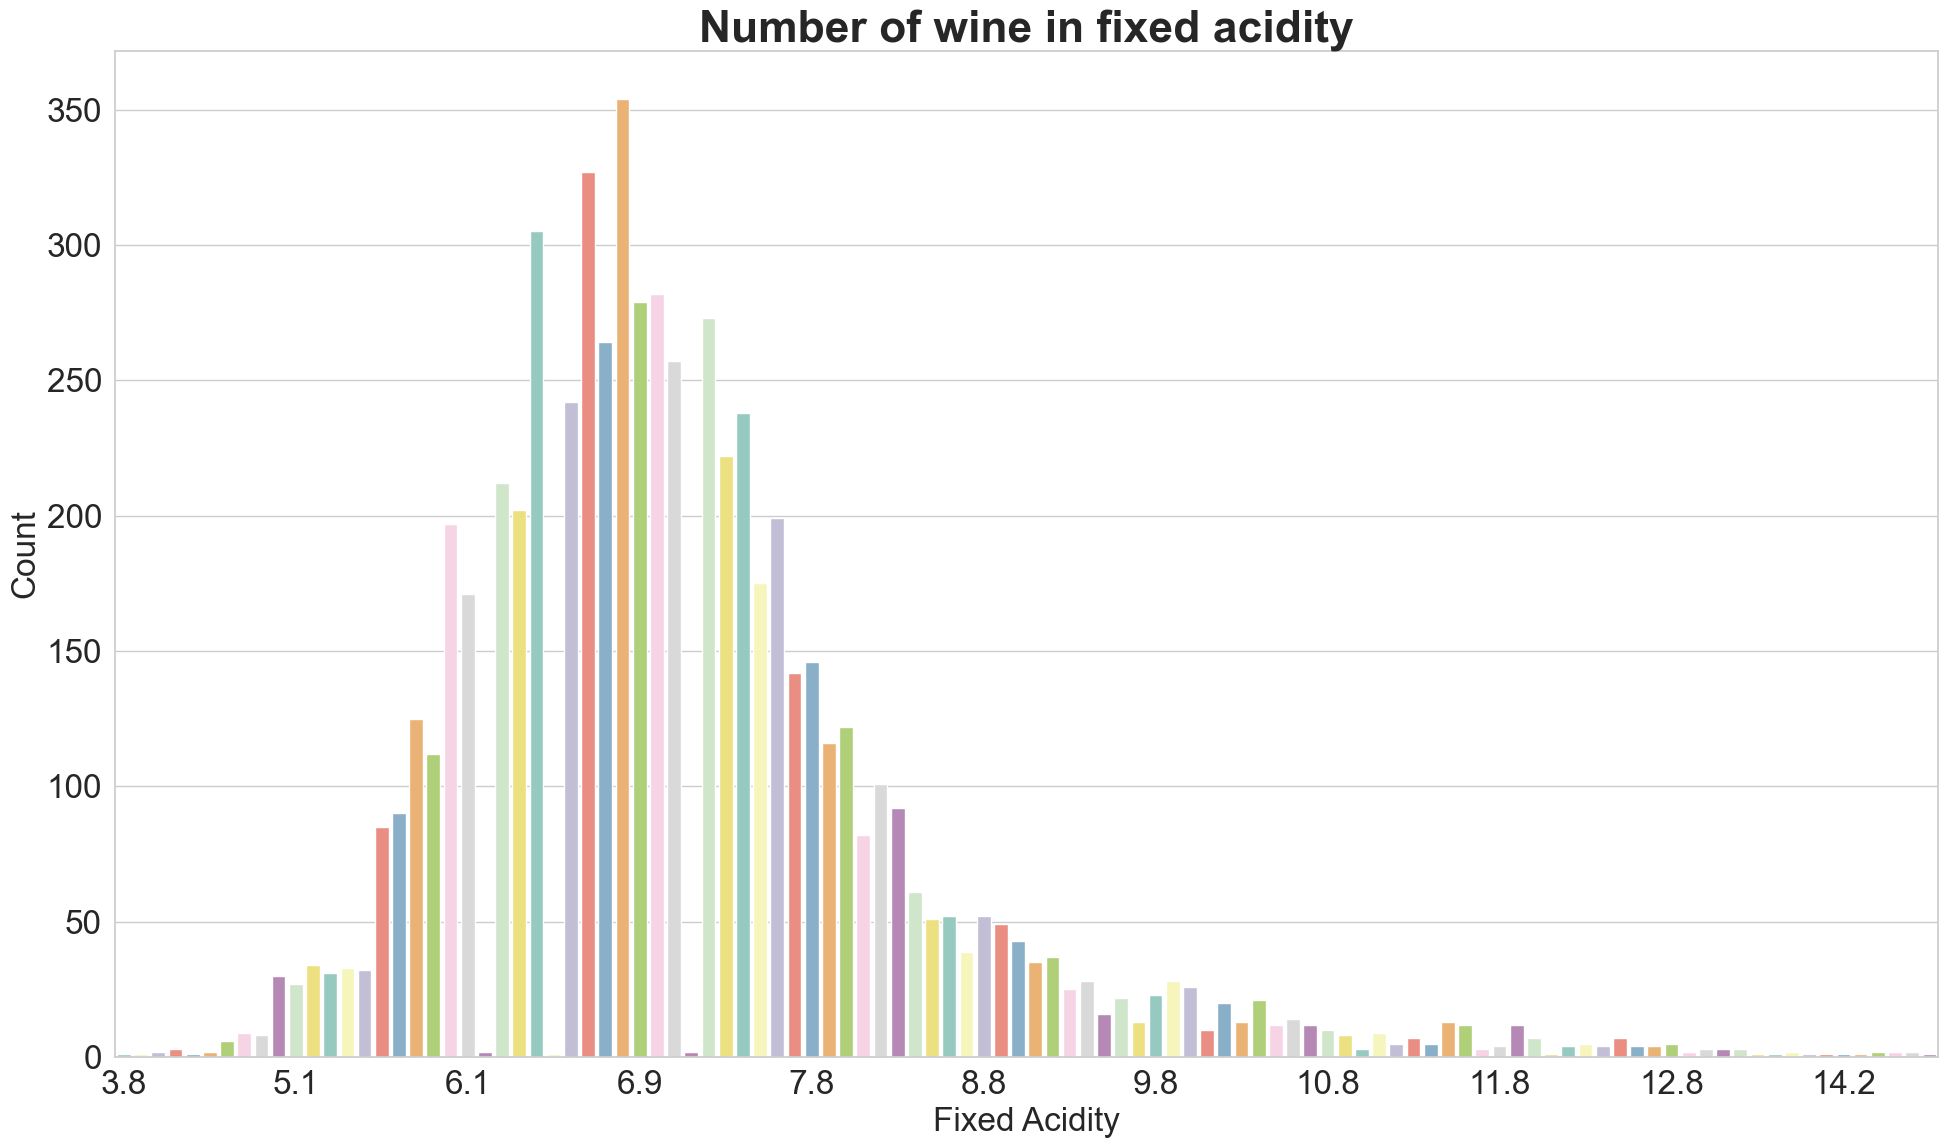

In [20]:
fixed_acidity = CountPlot(wine_df, 'fixed acidity', xticks_step=10)
fixed_acidity.plot_countplot()

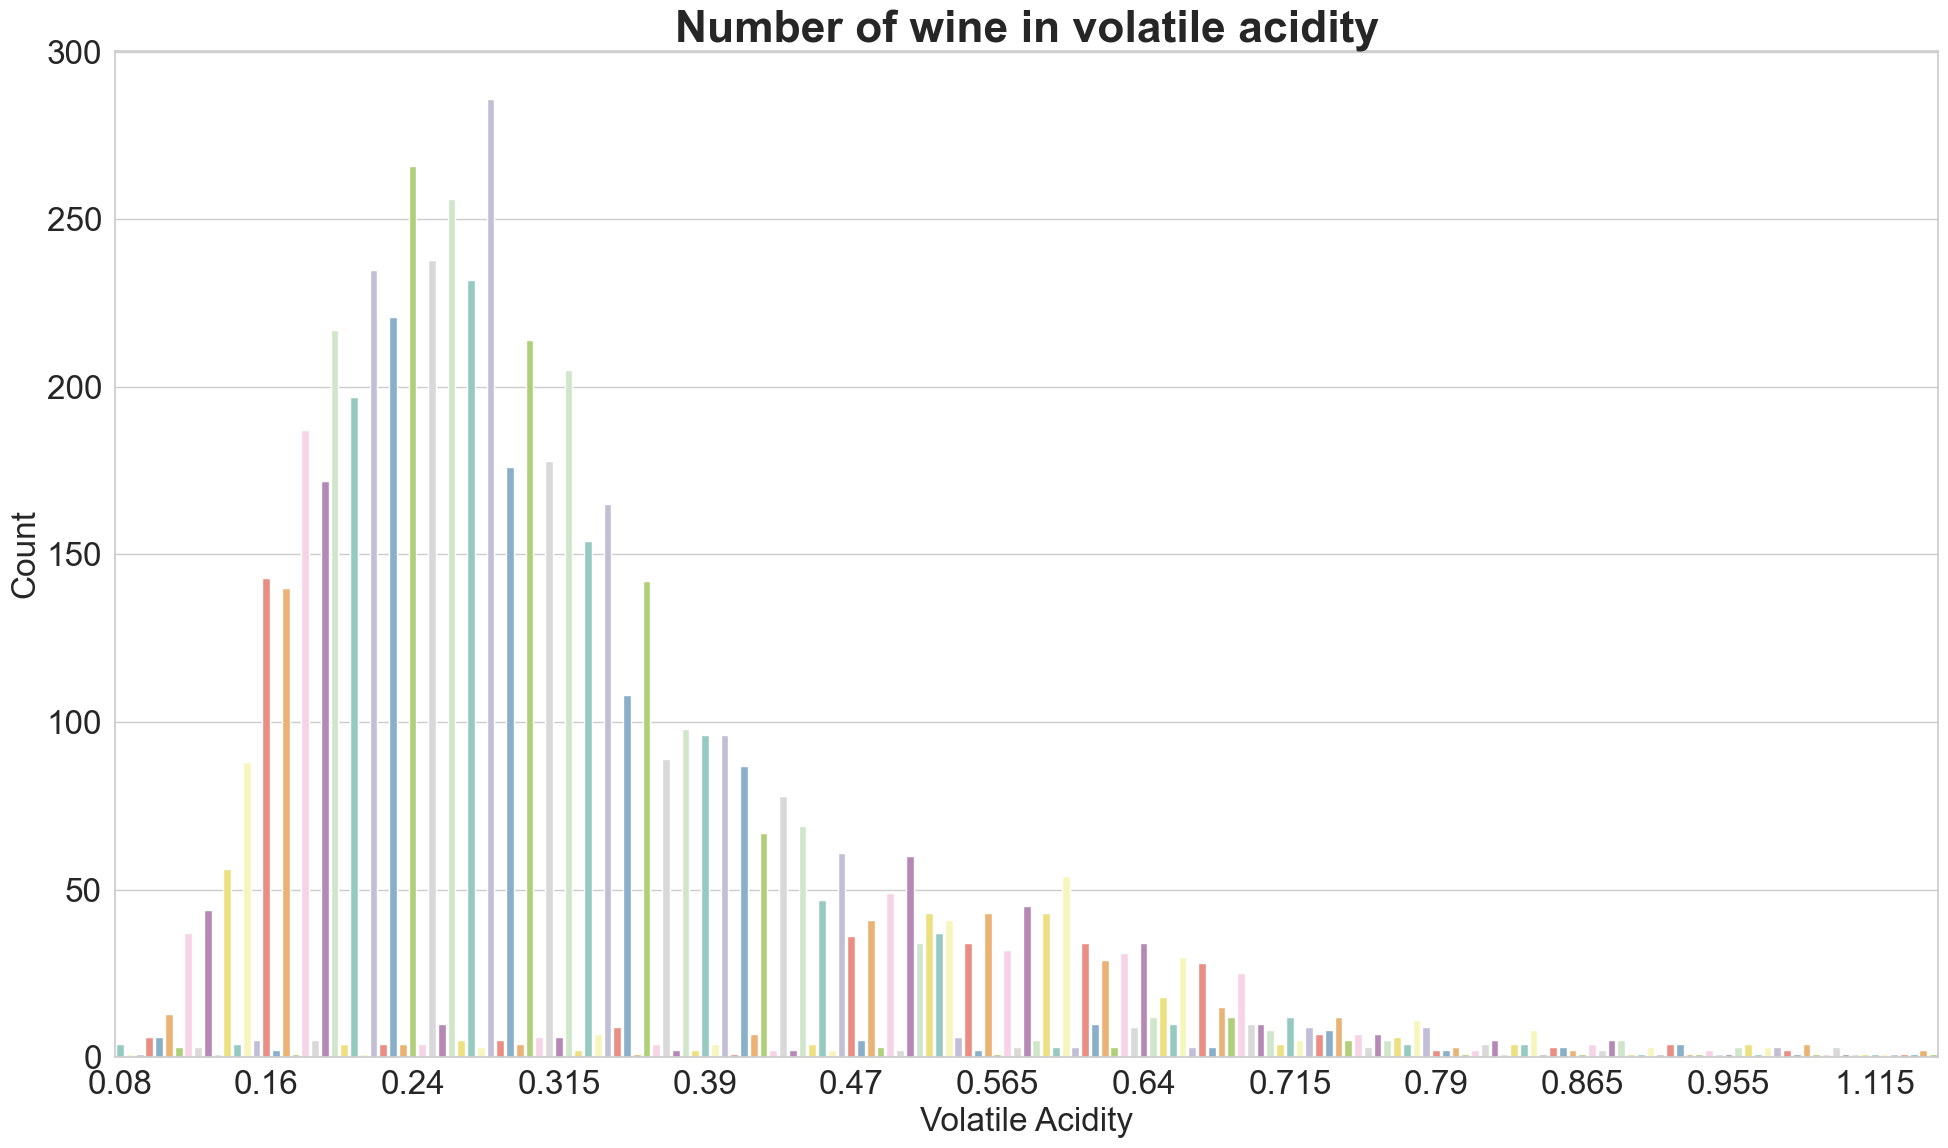

In [21]:
volatile_acidity = CountPlot(wine_df, 'volatile acidity', xticks_step=15)
volatile_acidity.plot_countplot()

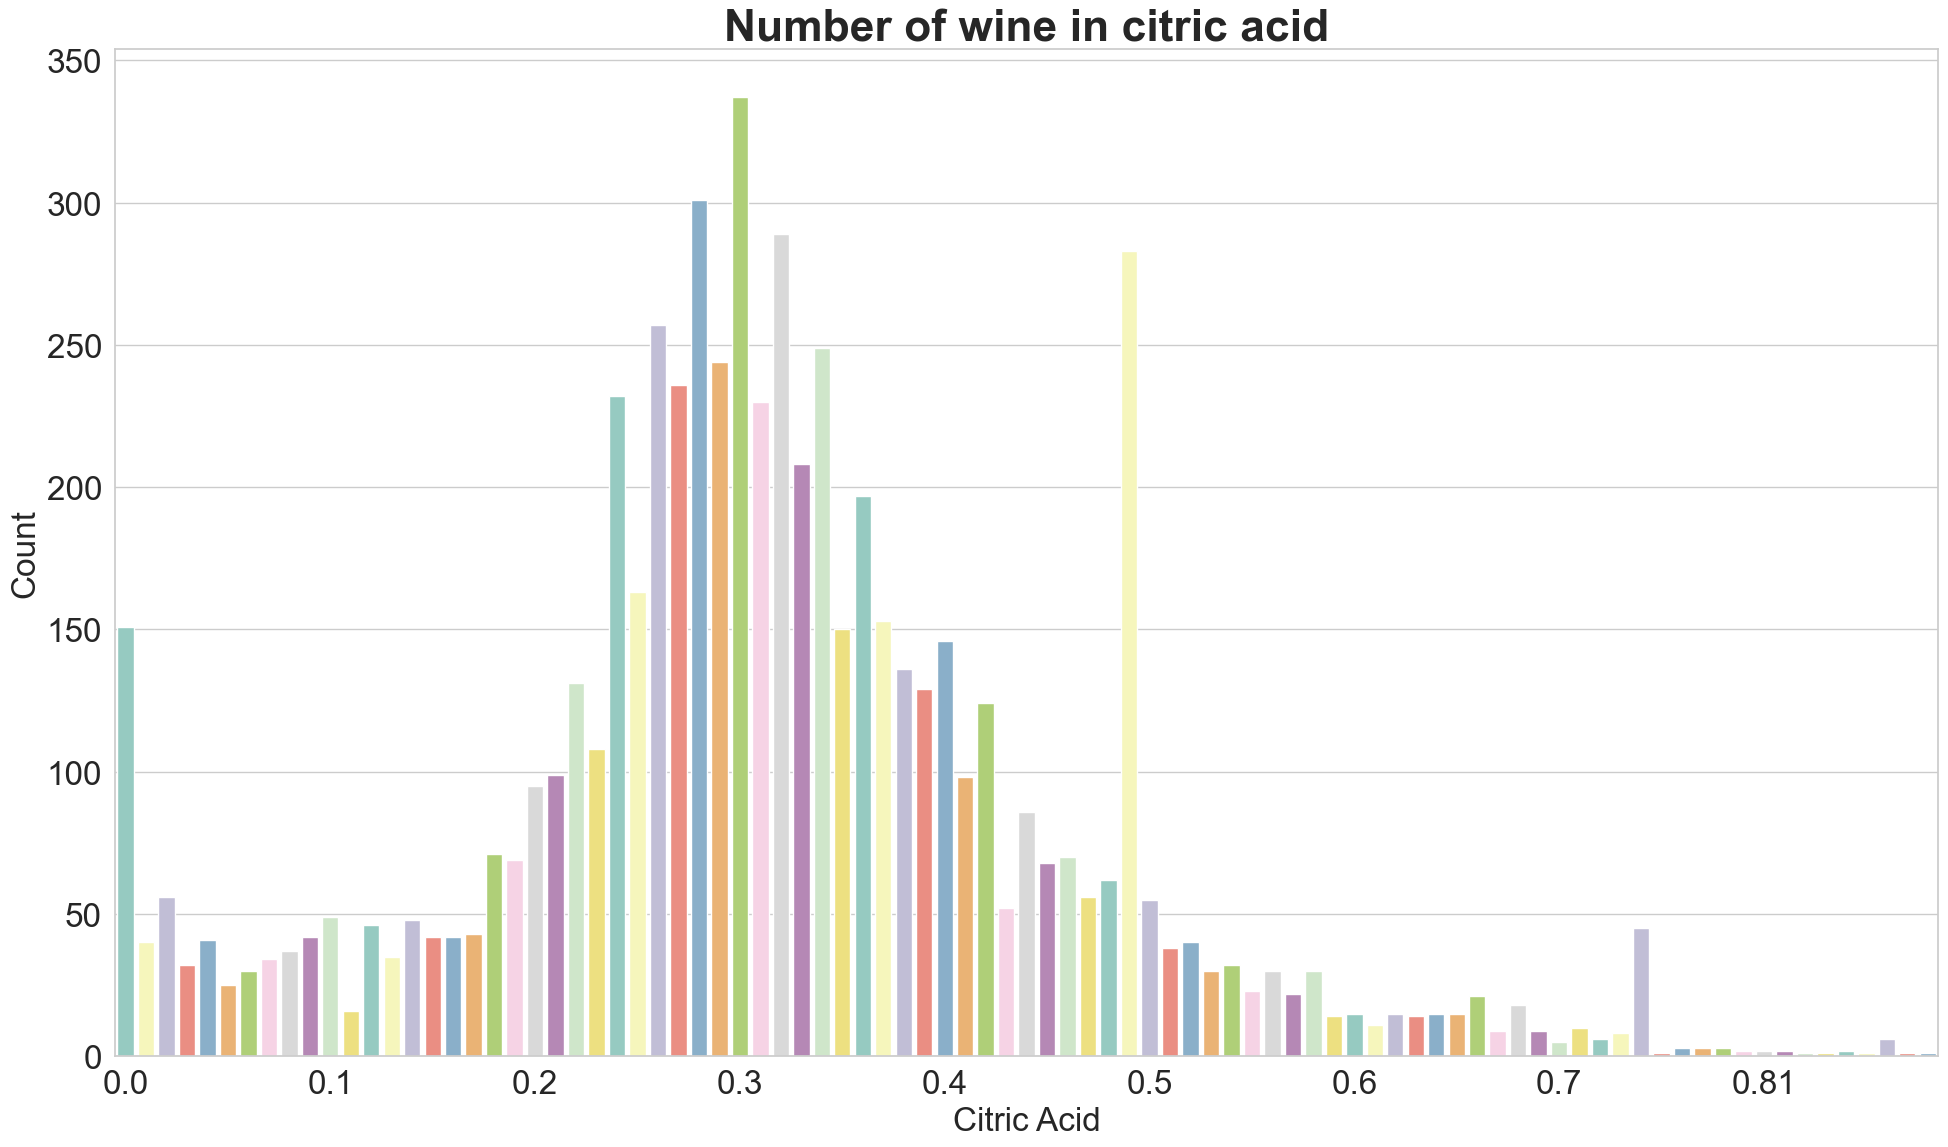

In [22]:
citric_acid = CountPlot(wine_df, 'citric acid', xticks_step=10)
citric_acid.plot_countplot()

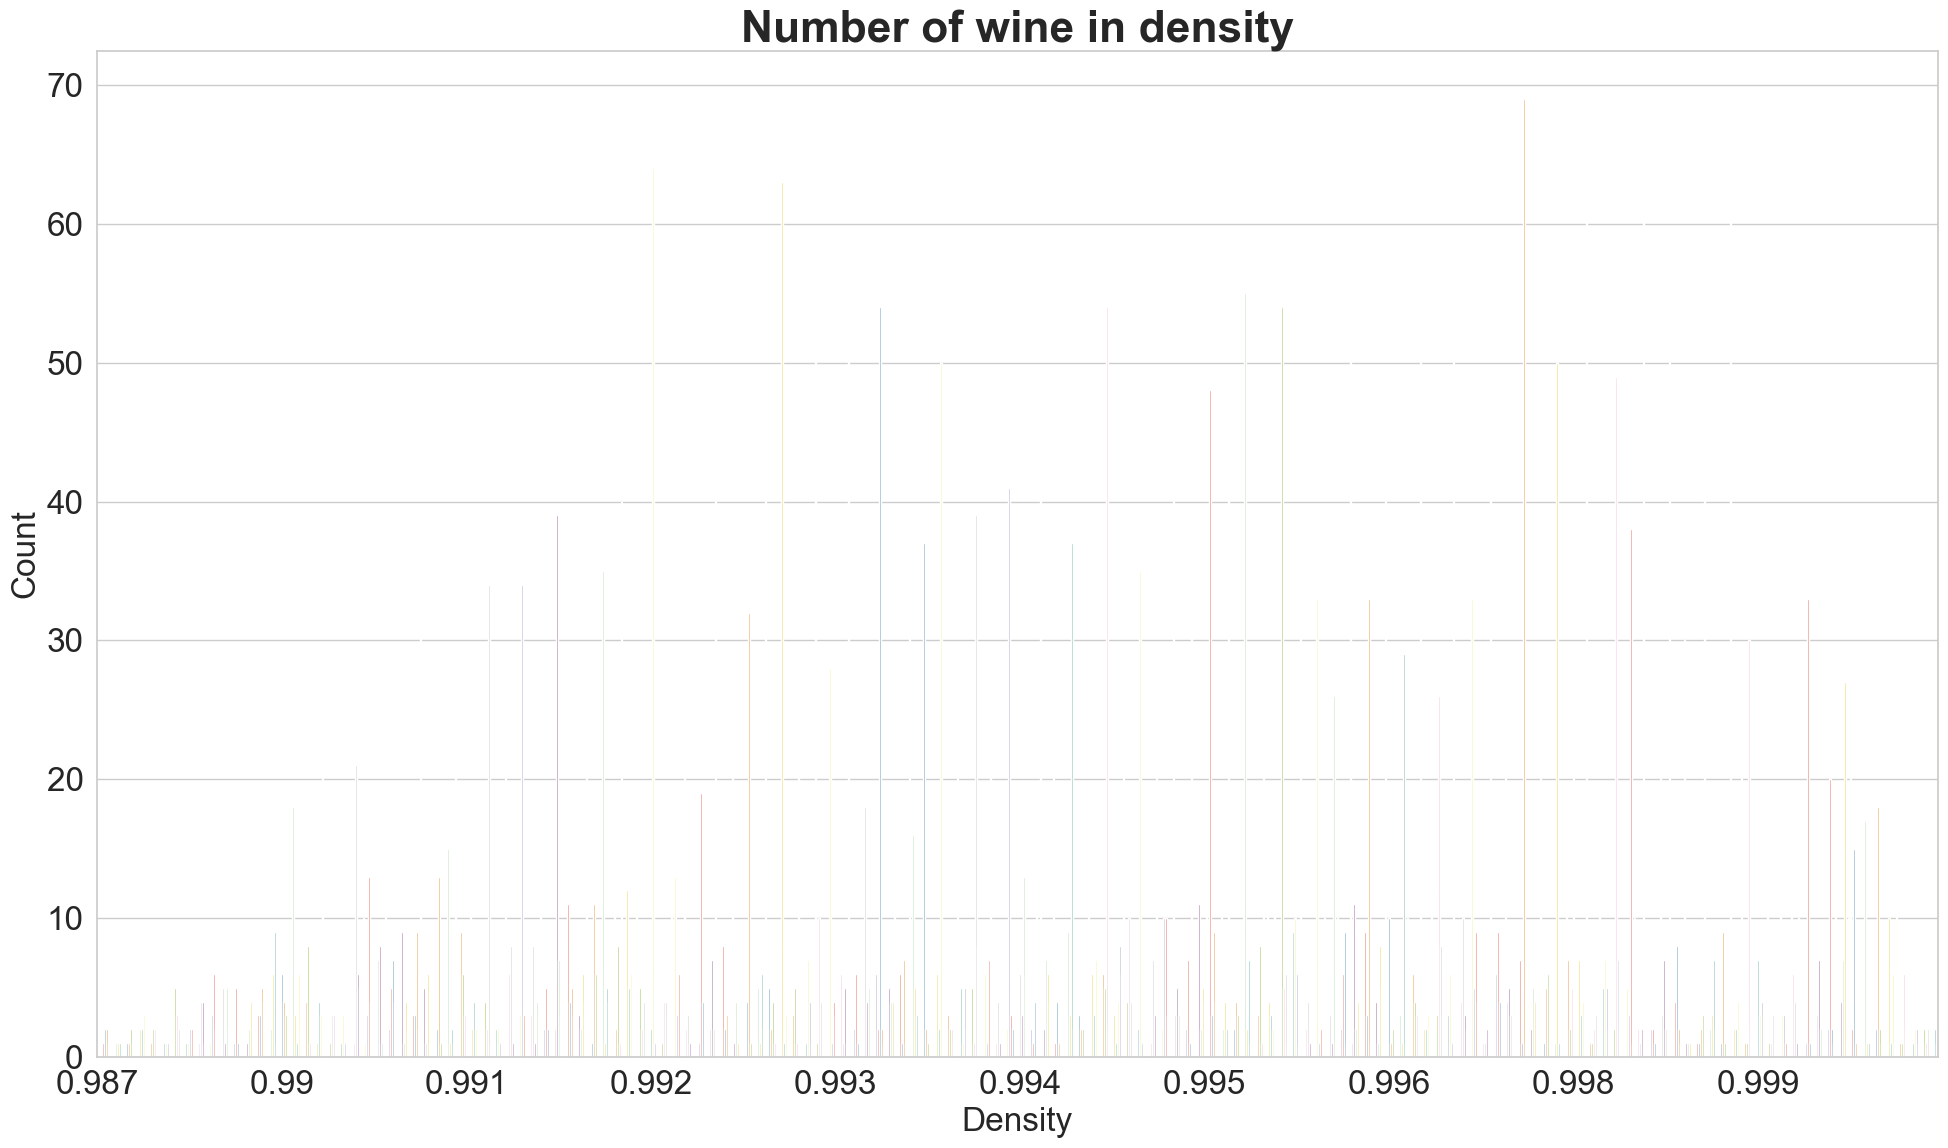

In [23]:
density = CountPlot(wine_df, 'density', xticks_step=100)
density.plot_countplot()

In [24]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

<Axes: xlabel='quality', ylabel='Density'>

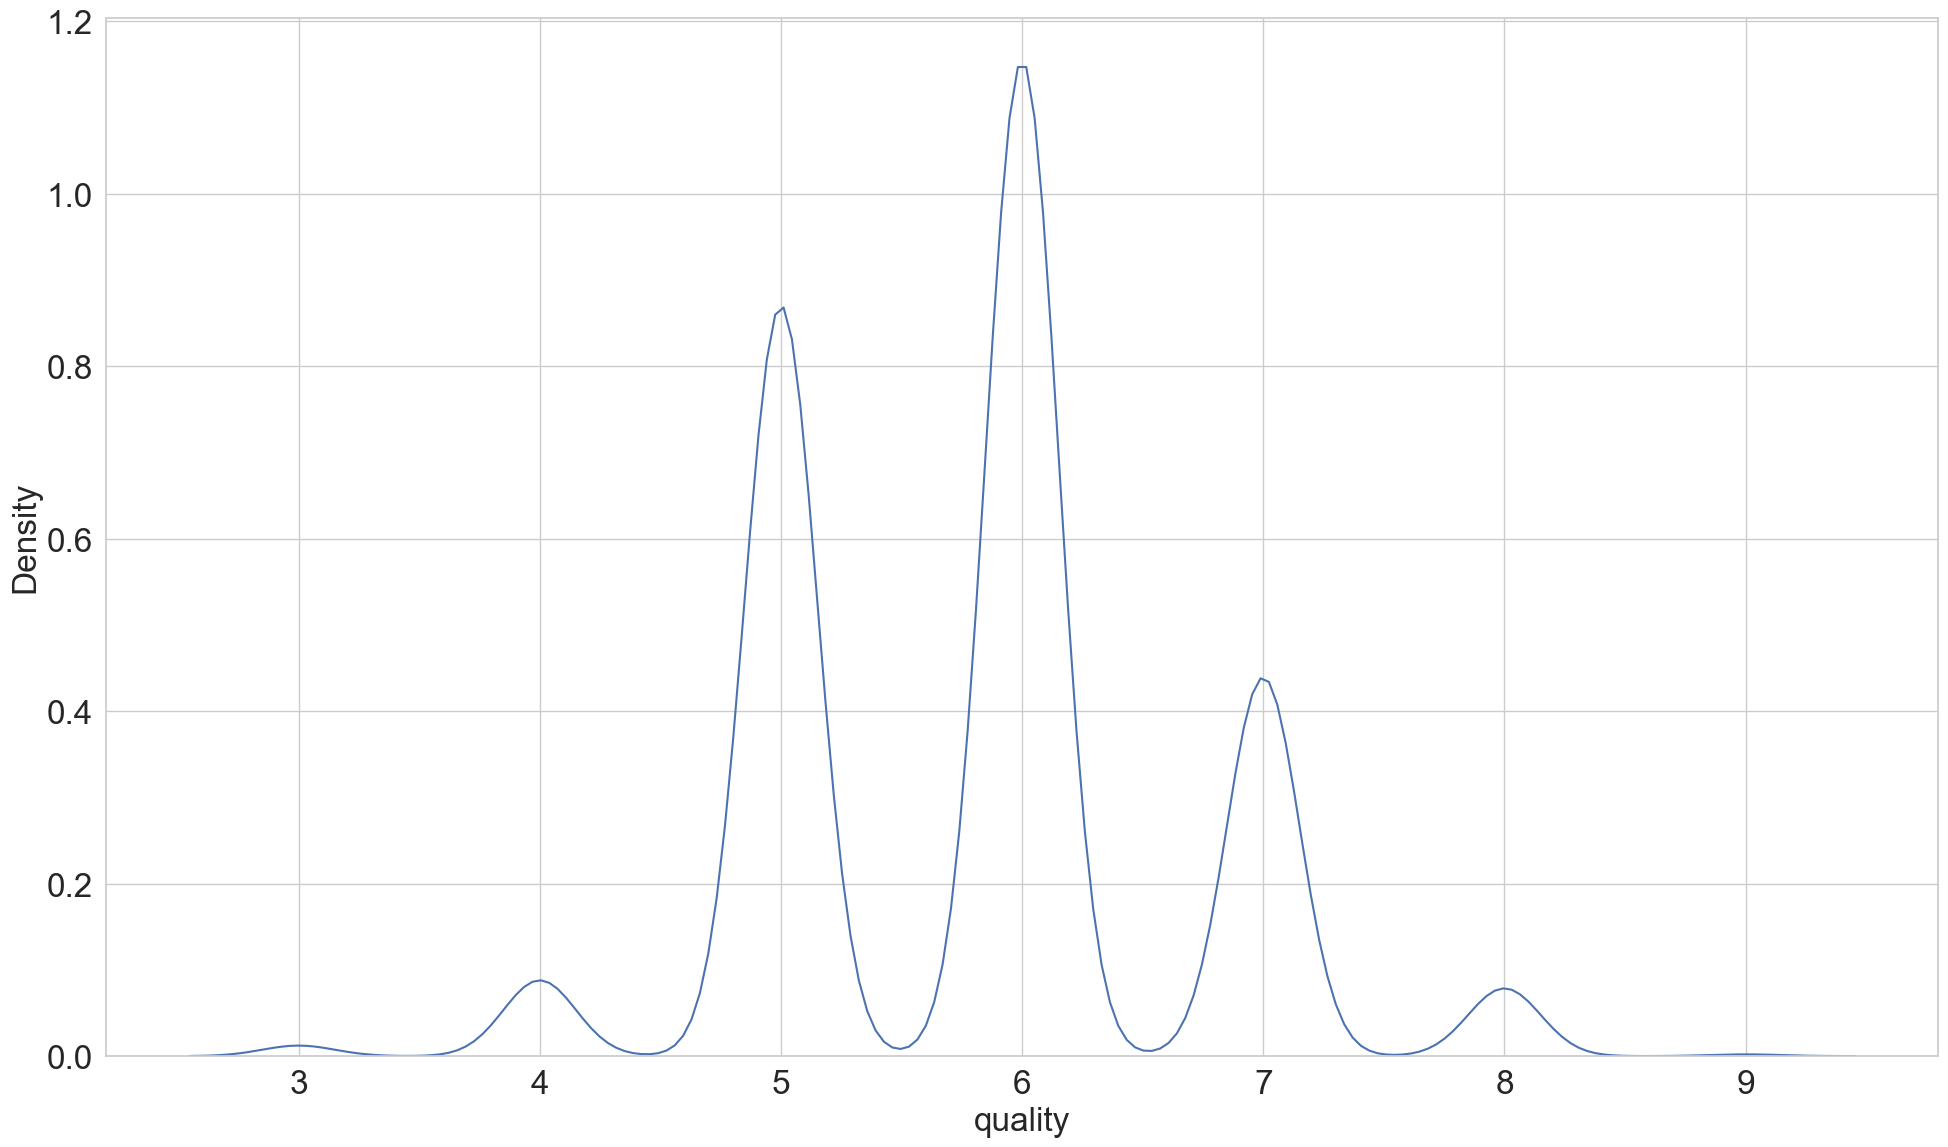

In [25]:
sns.kdeplot(wine_df.query('quality > 2').quality)

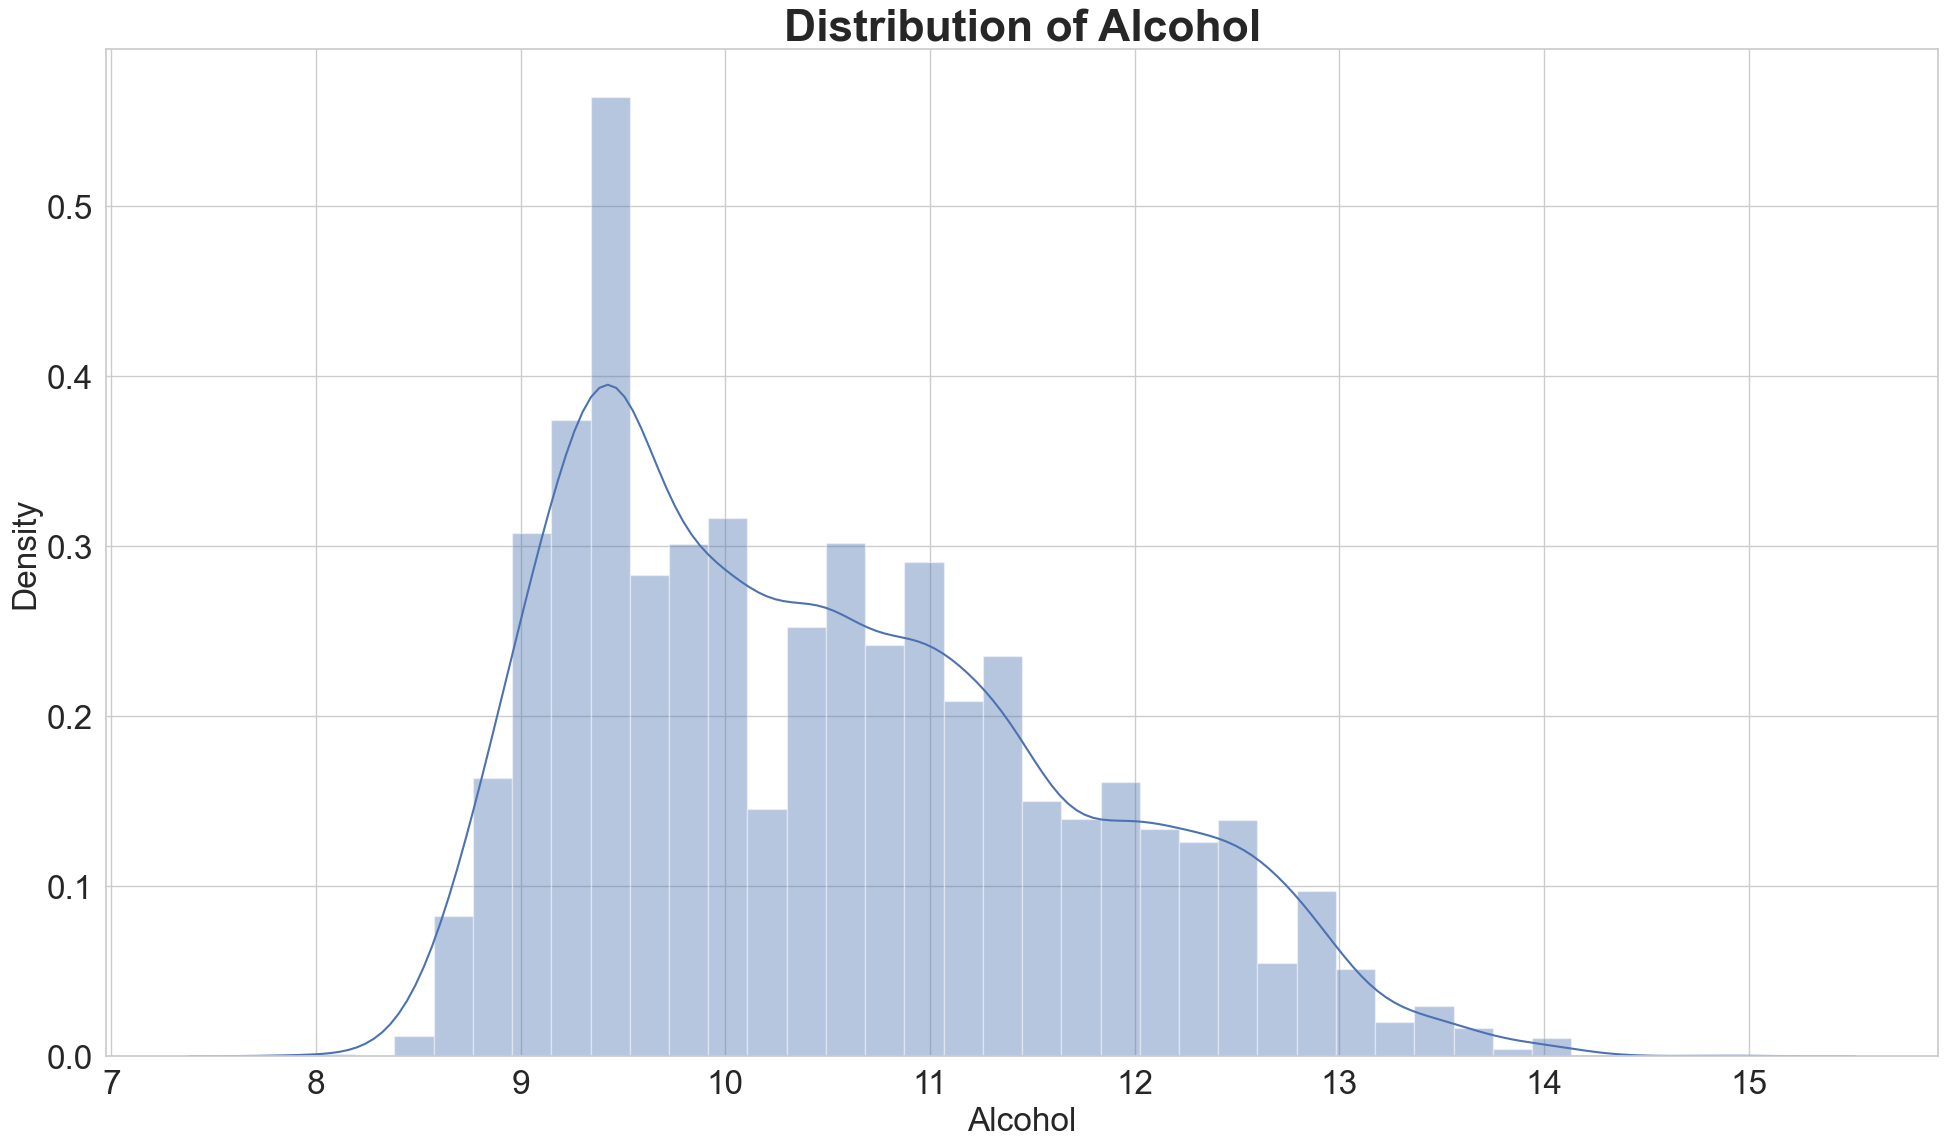

In [26]:
sns.histplot(wine_df['alcohol'],
             kde=True, stat='density',
             kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.savefig('image_result/alcohol_distribution.png')

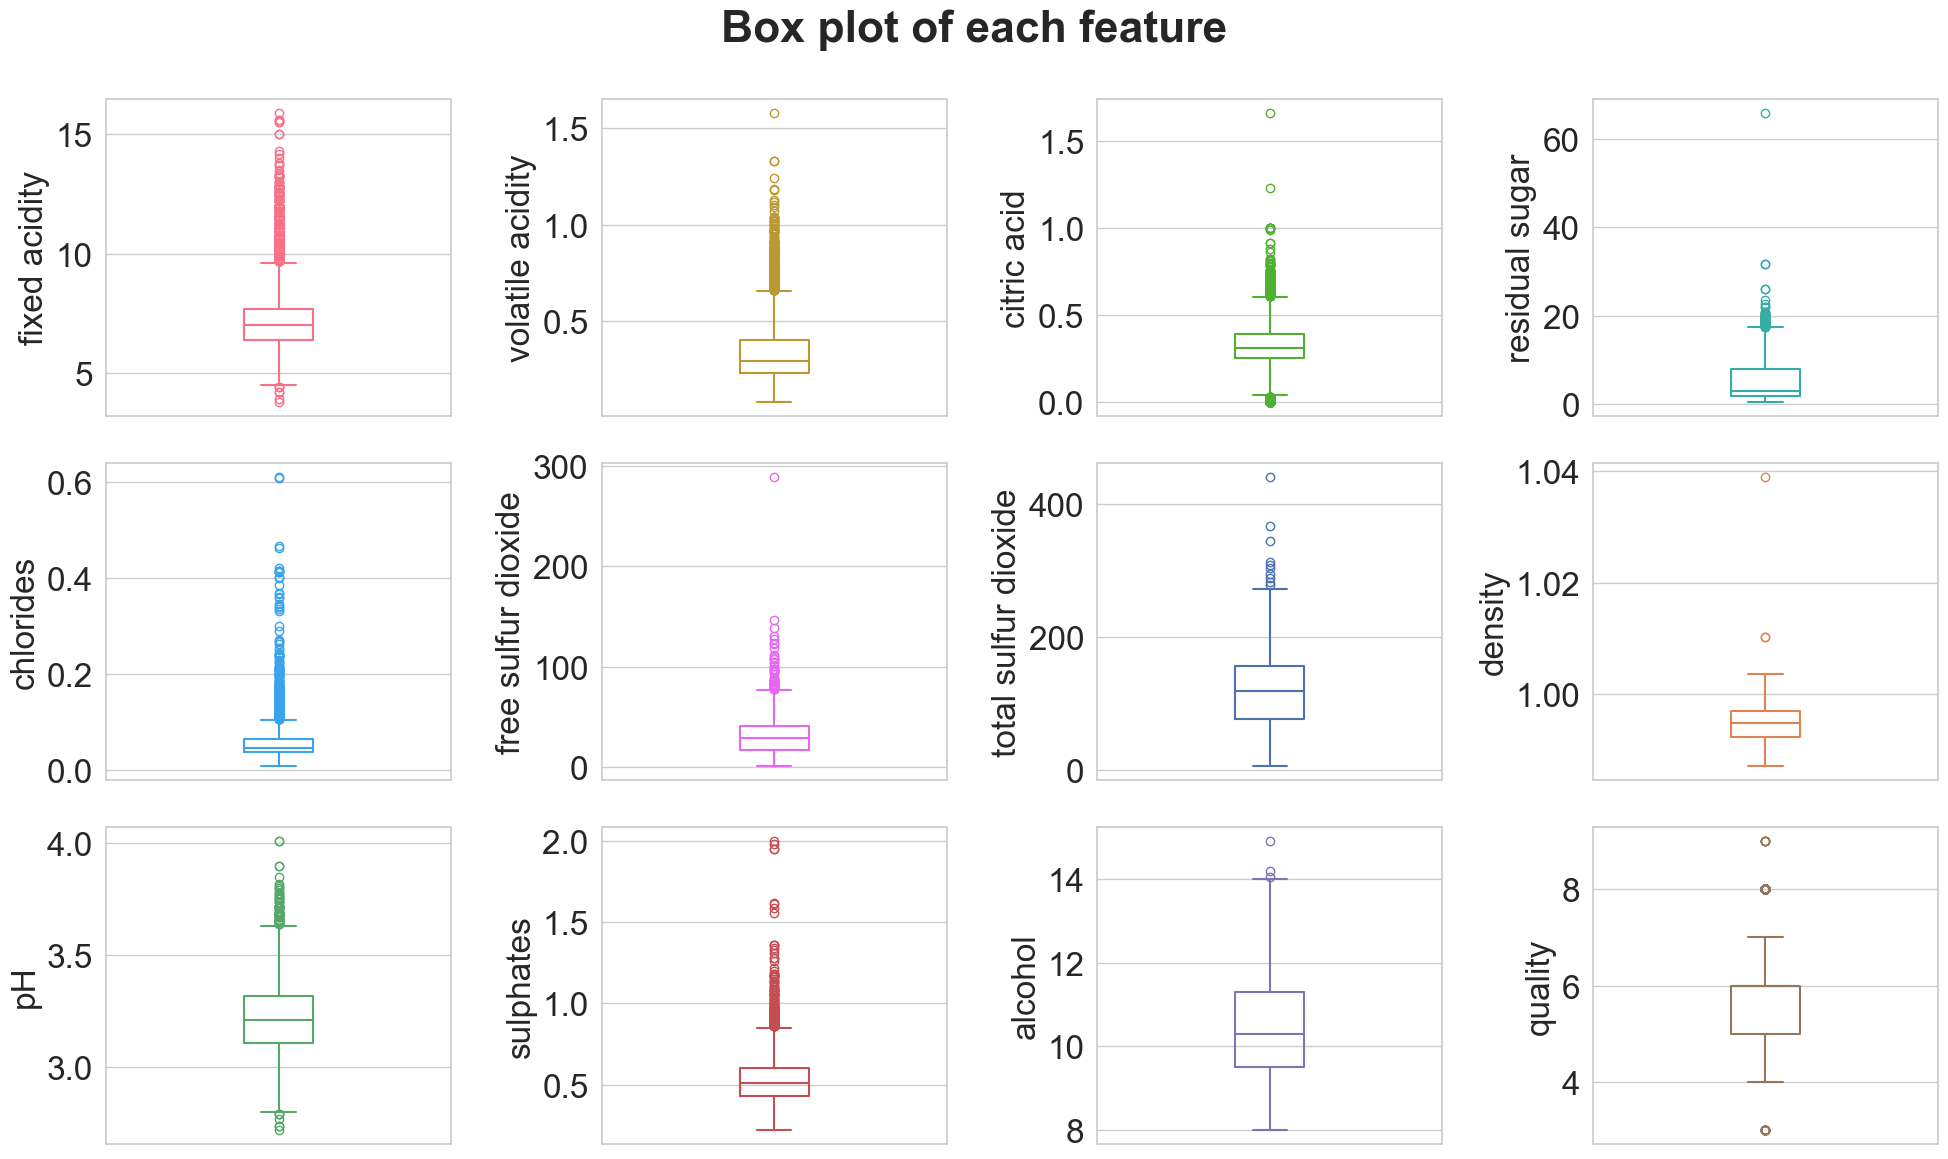

In [27]:
nrows = 3
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.suptitle('Box plot of each feature')
color = sns.color_palette('husl') + sns.color_palette()

feature = 0
for i in range(nrows):
    for j in range(ncols):
        sns.boxplot(ax=axes[i, j], data=wine_df,
                      y=wine_df.columns[feature],
                      fill=False, width=.2,
                      color=color[feature])
        feature += 1

plt.savefig('image_result/feature_boxplot.png')

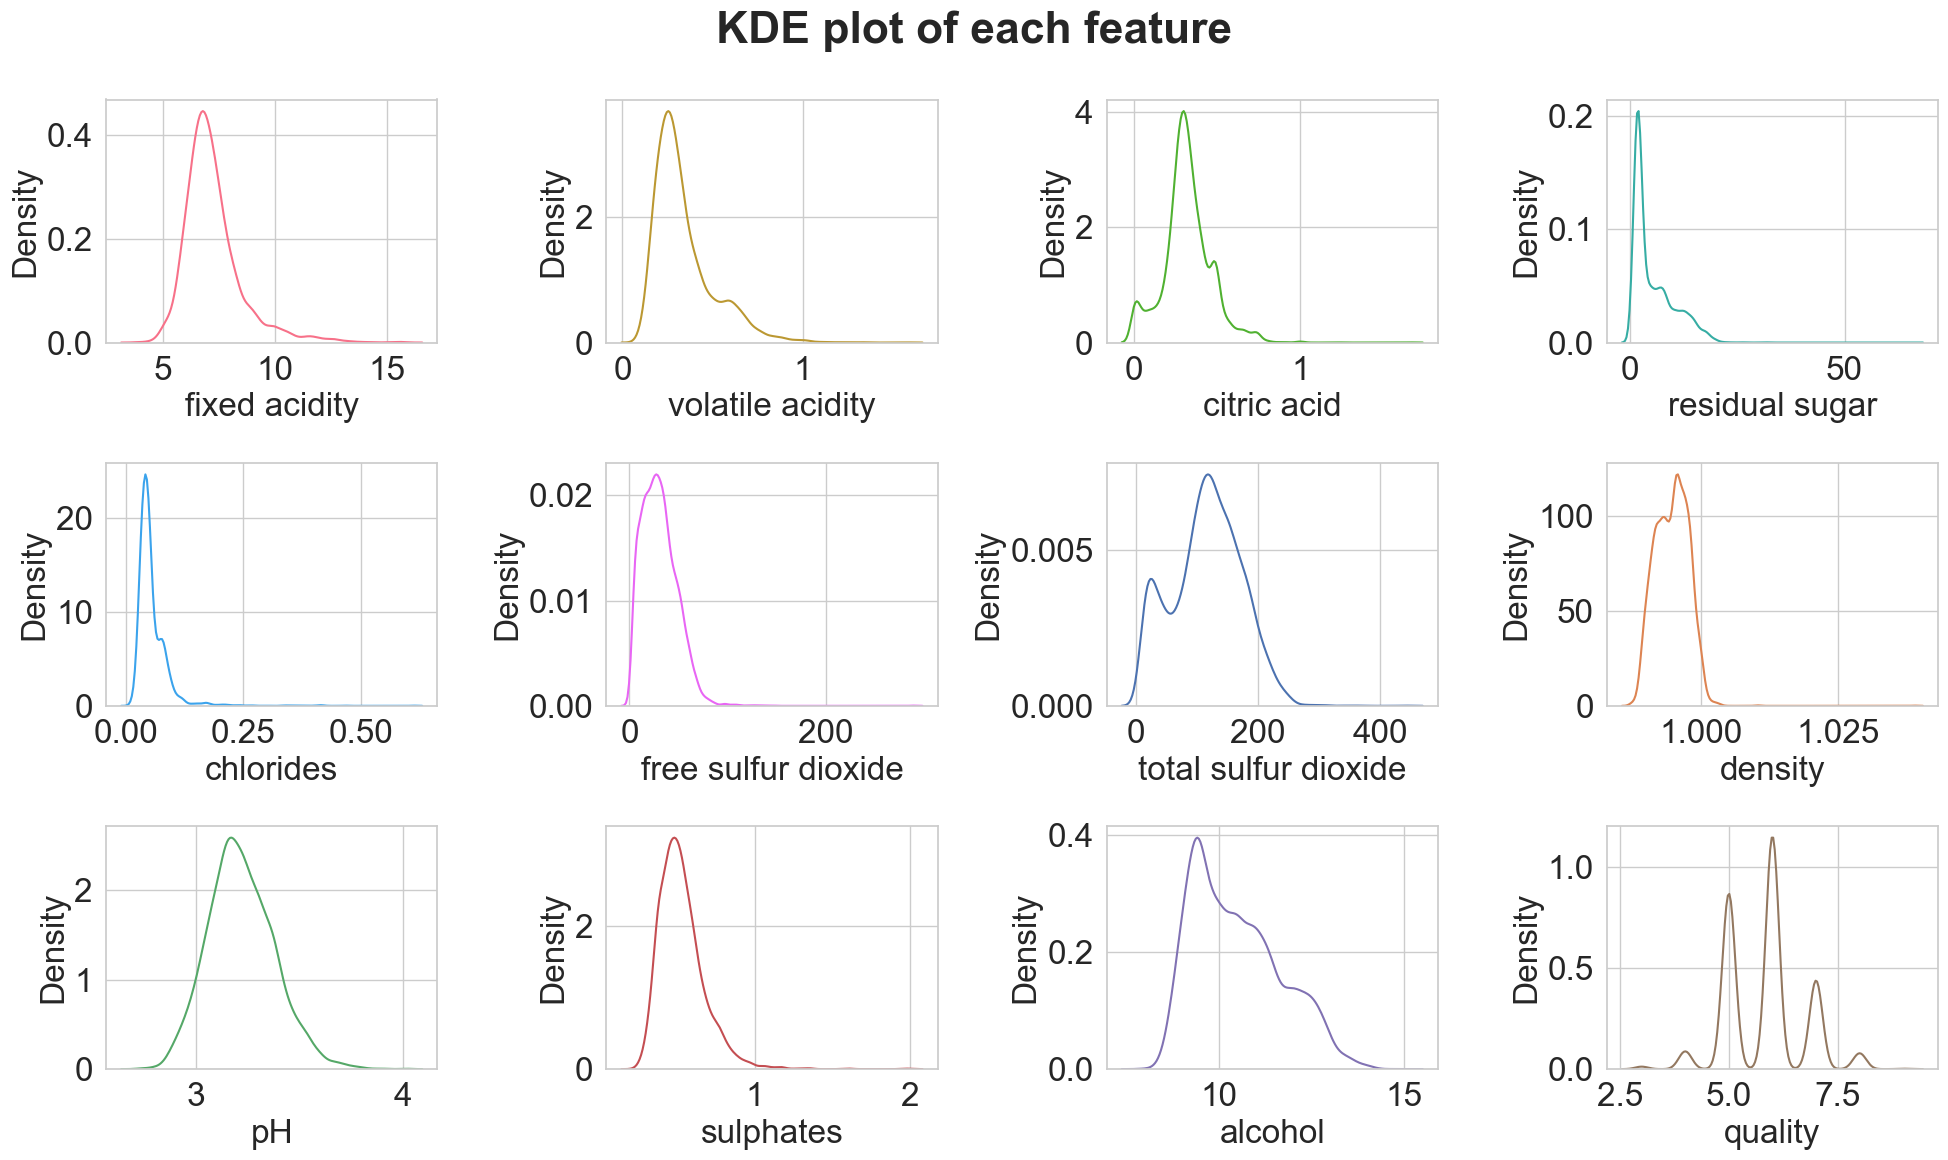

In [28]:
nrows = 3
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.suptitle('KDE plot of each feature')
color = sns.color_palette('husl') + sns.color_palette()

feature = 0
for i in range(nrows):
    for j in range(ncols):
        sns.kdeplot(ax=axes[i, j], data=wine_df,
                    x=wine_df.columns[feature],
                    color=color[feature])
        feature += 1

plt.savefig('image_result/feature_kdeplot.png')

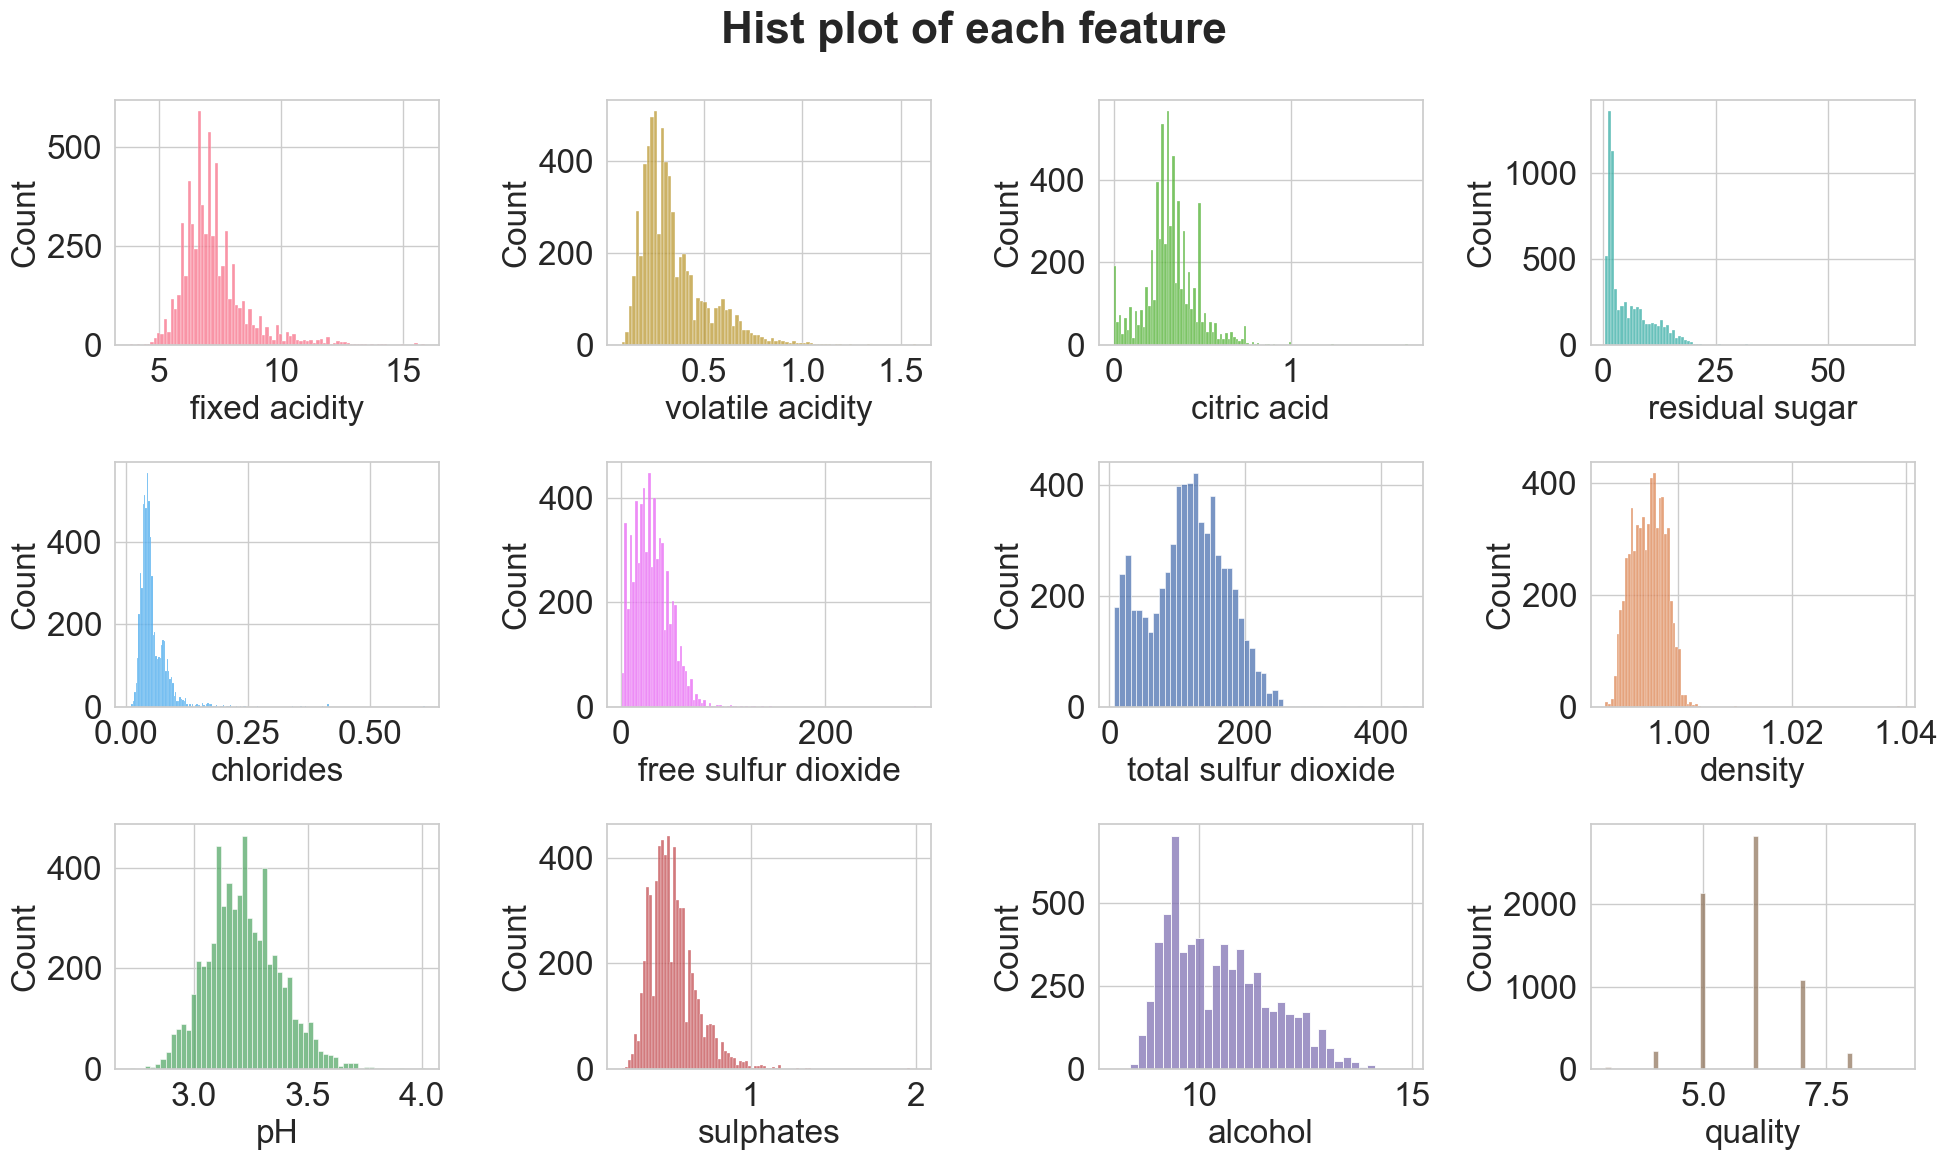

In [29]:
nrows = 3
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.suptitle('Hist plot of each feature')
color = sns.color_palette('husl') + sns.color_palette()

feature = 0
for i in range(nrows):
    for j in range(ncols):
        sns.histplot(ax=axes[i, j], data=wine_df,
                    x=wine_df.columns[feature],
                    color=color[feature])
        feature += 1

plt.savefig('image_result/feature_histplot.png')

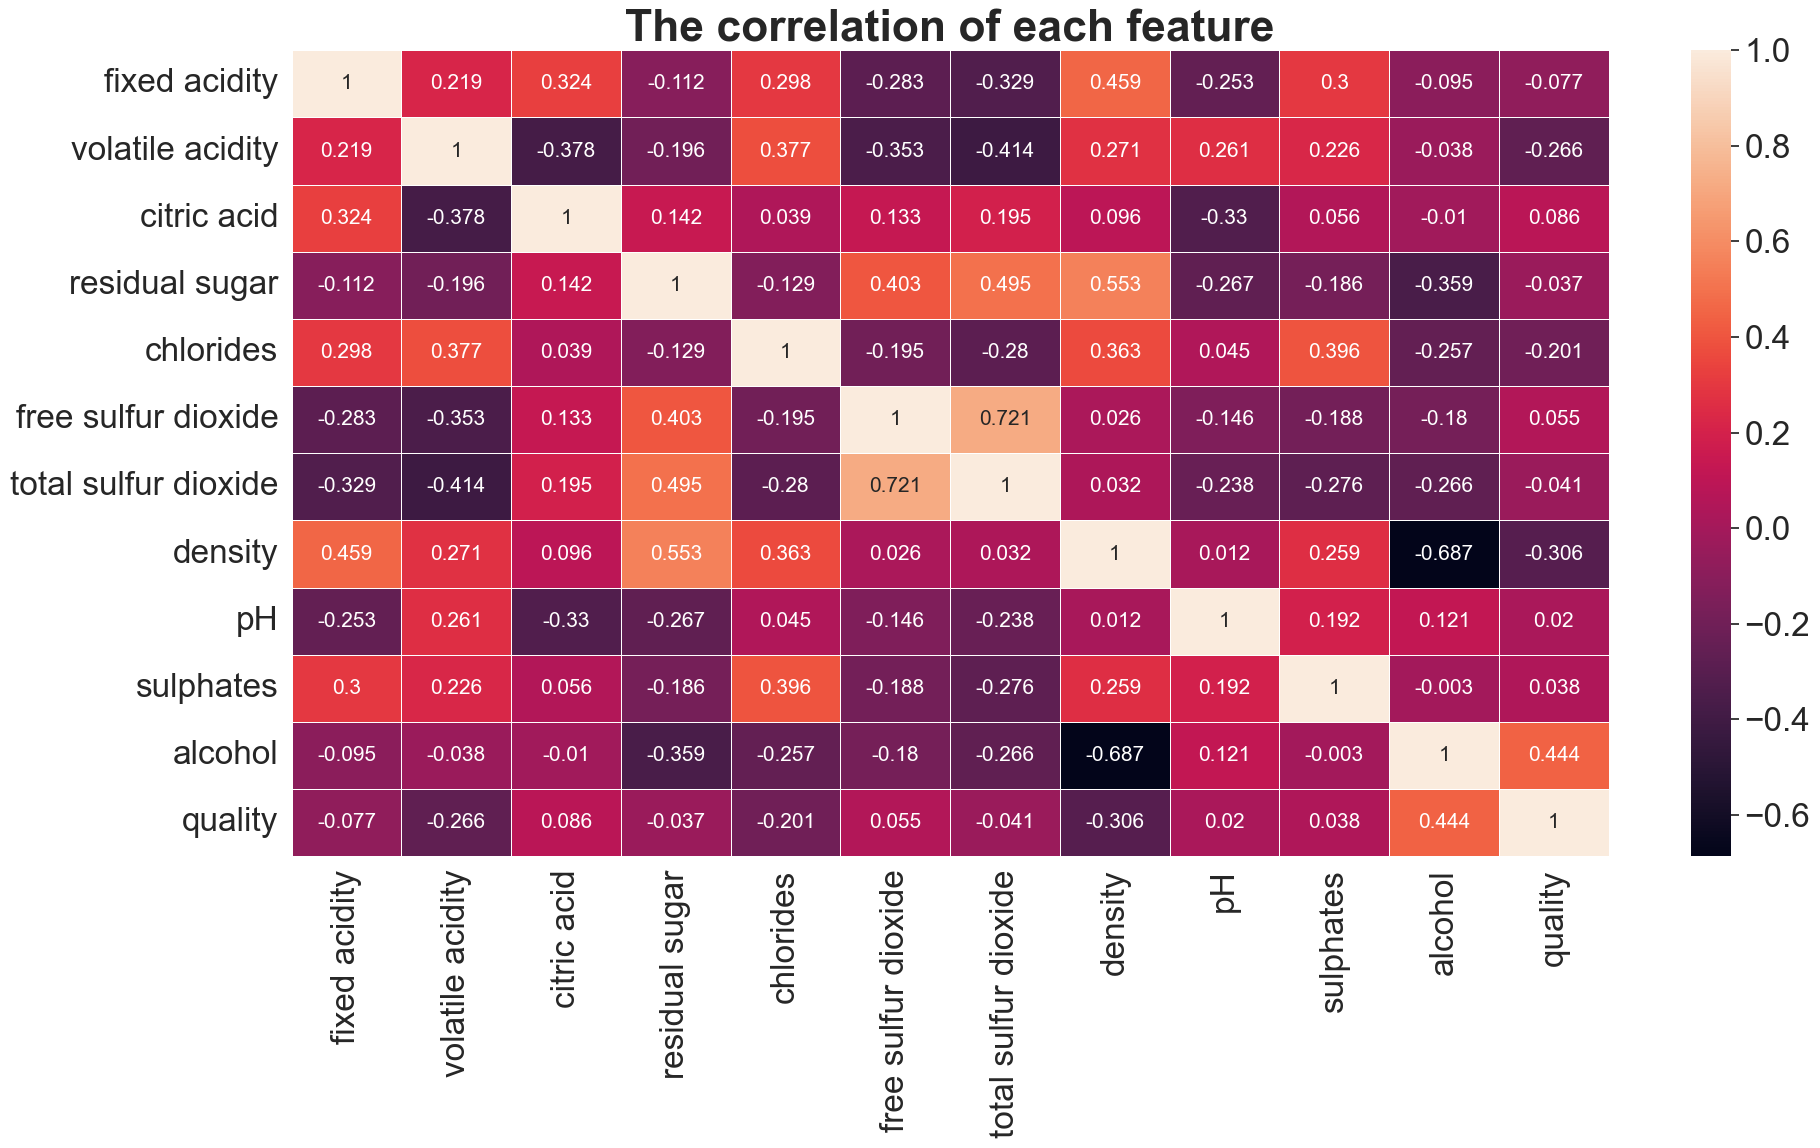

In [30]:
sns.heatmap(wine_df.corr().round(3),
            annot=True,
            linewidths=.5,
            fmt='n',
            annot_kws={'size': 15}
)
plt.title("The correlation of each feature")
plt.savefig('image_result/feature_heatmap.png')

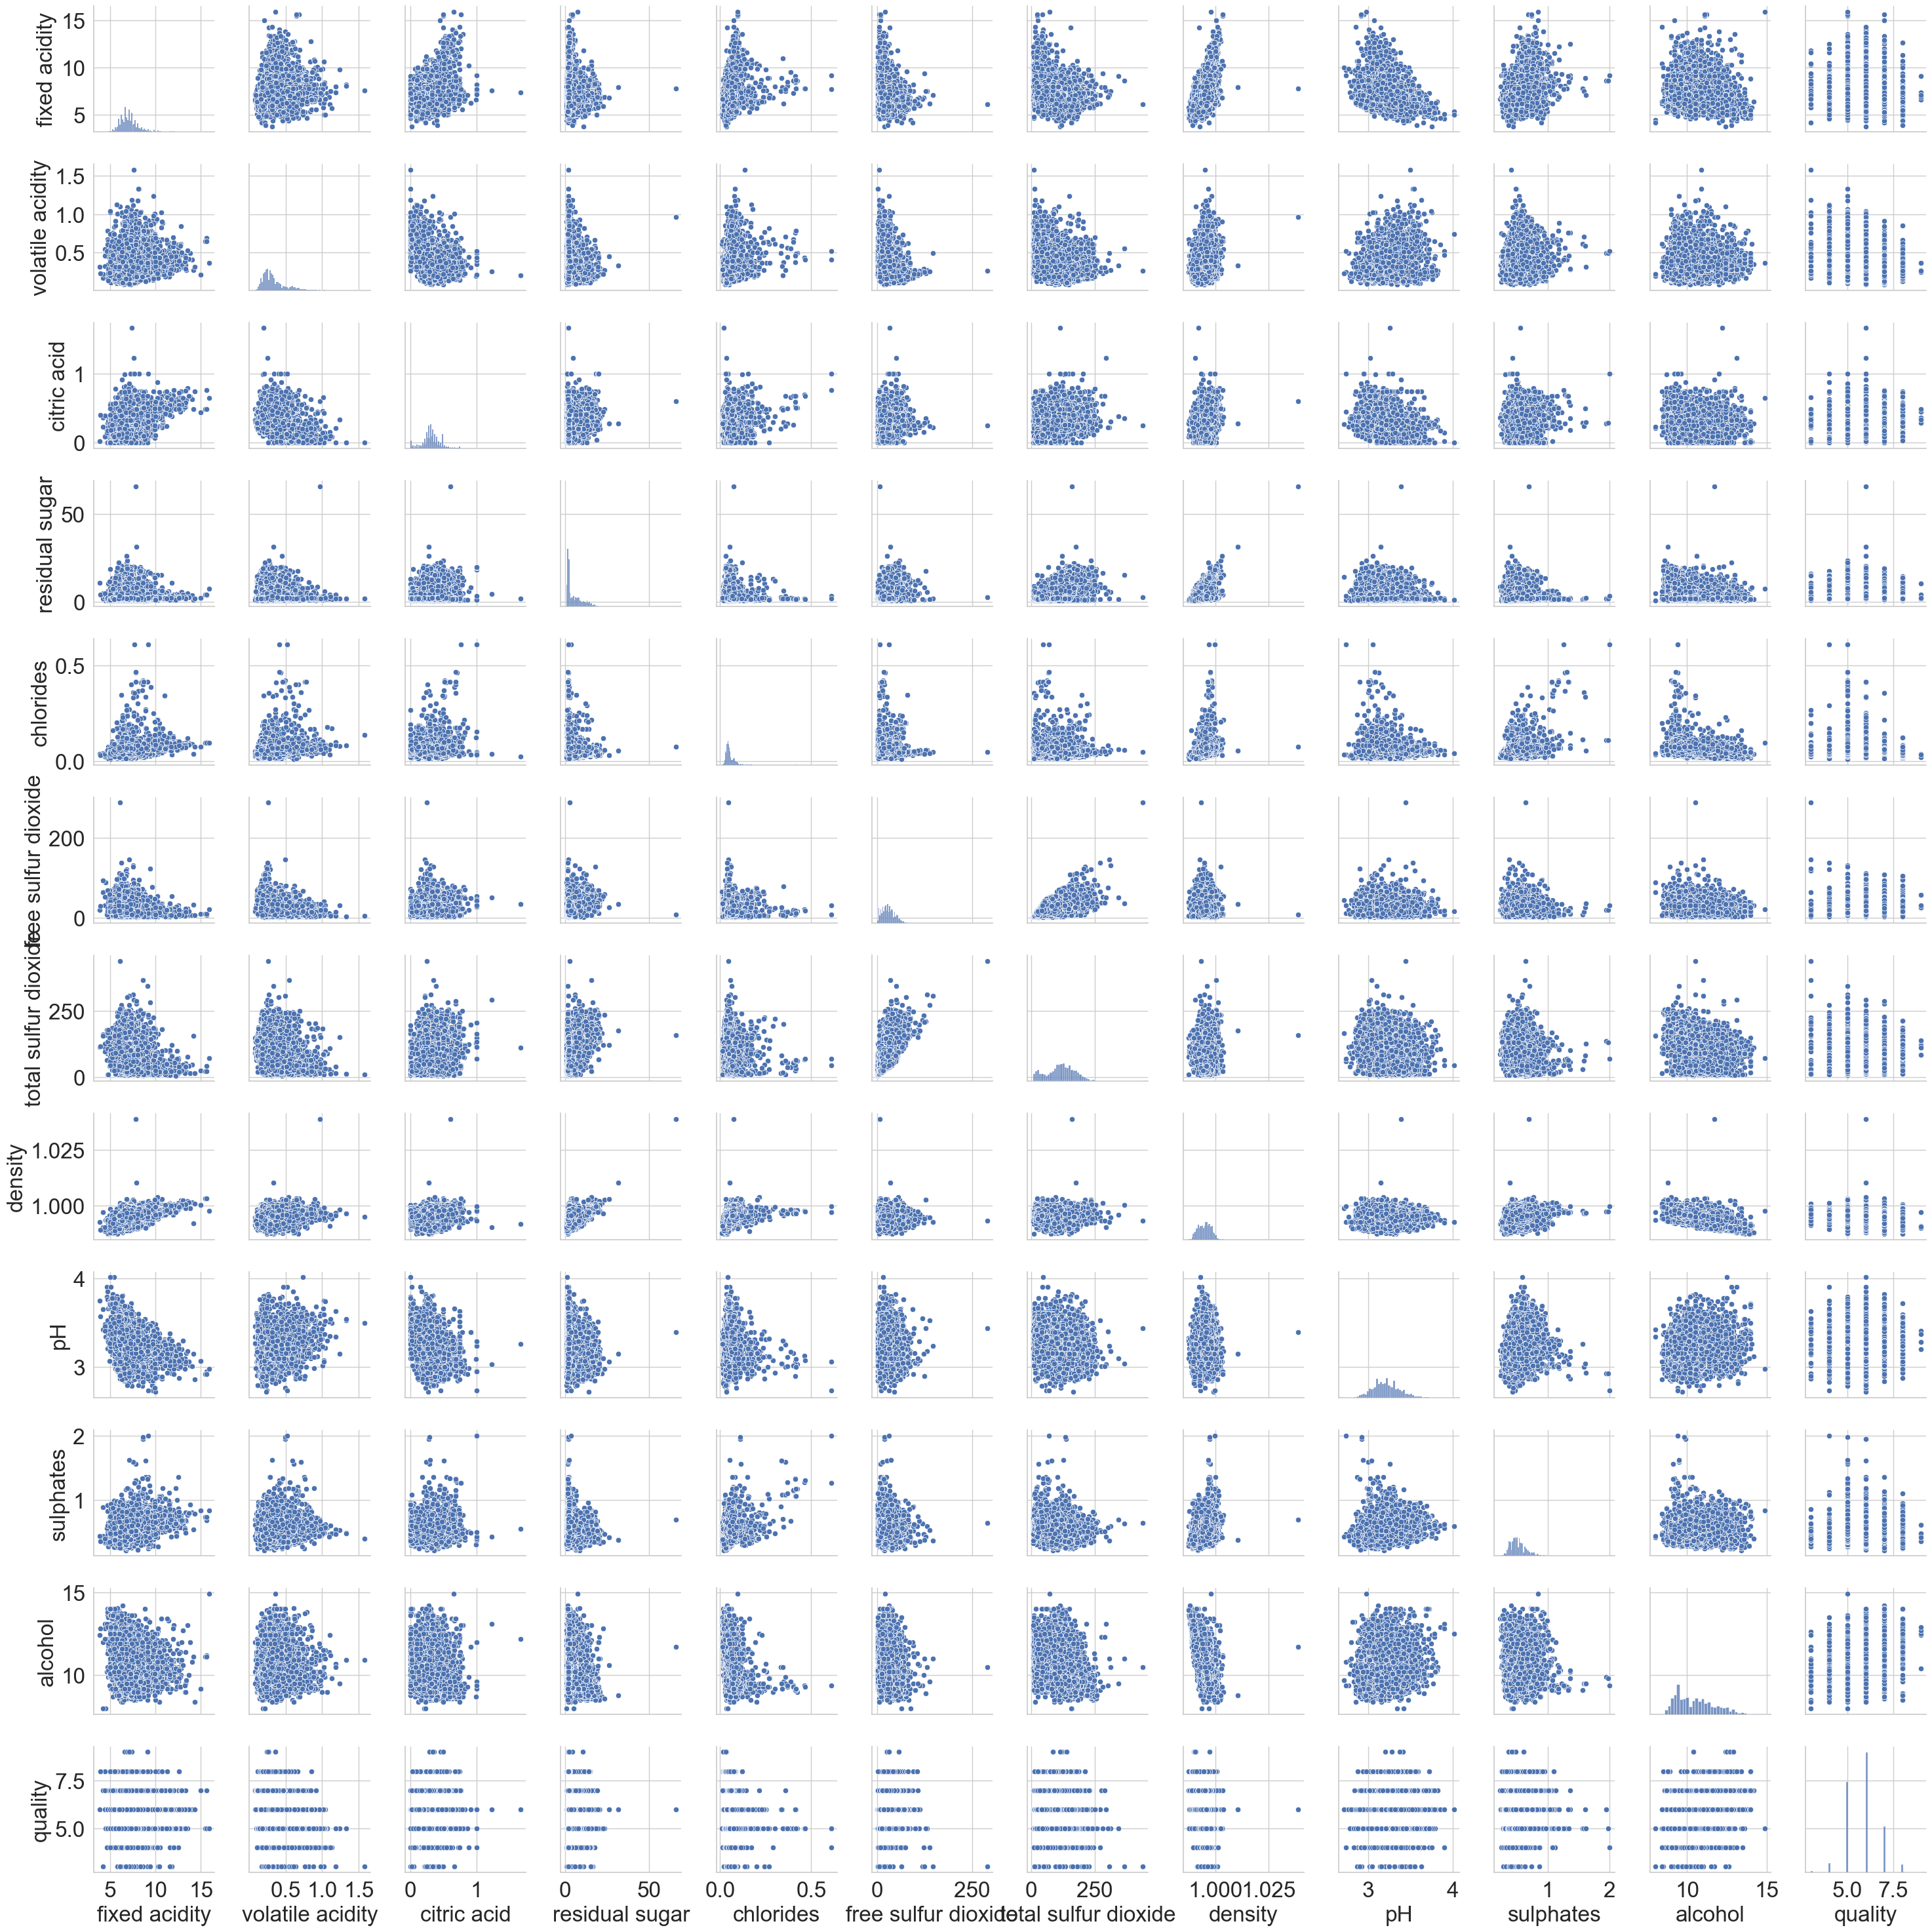

In [31]:
sns.pairplot(wine_df)
plt.savefig('image_result/feature_pairplot.png')

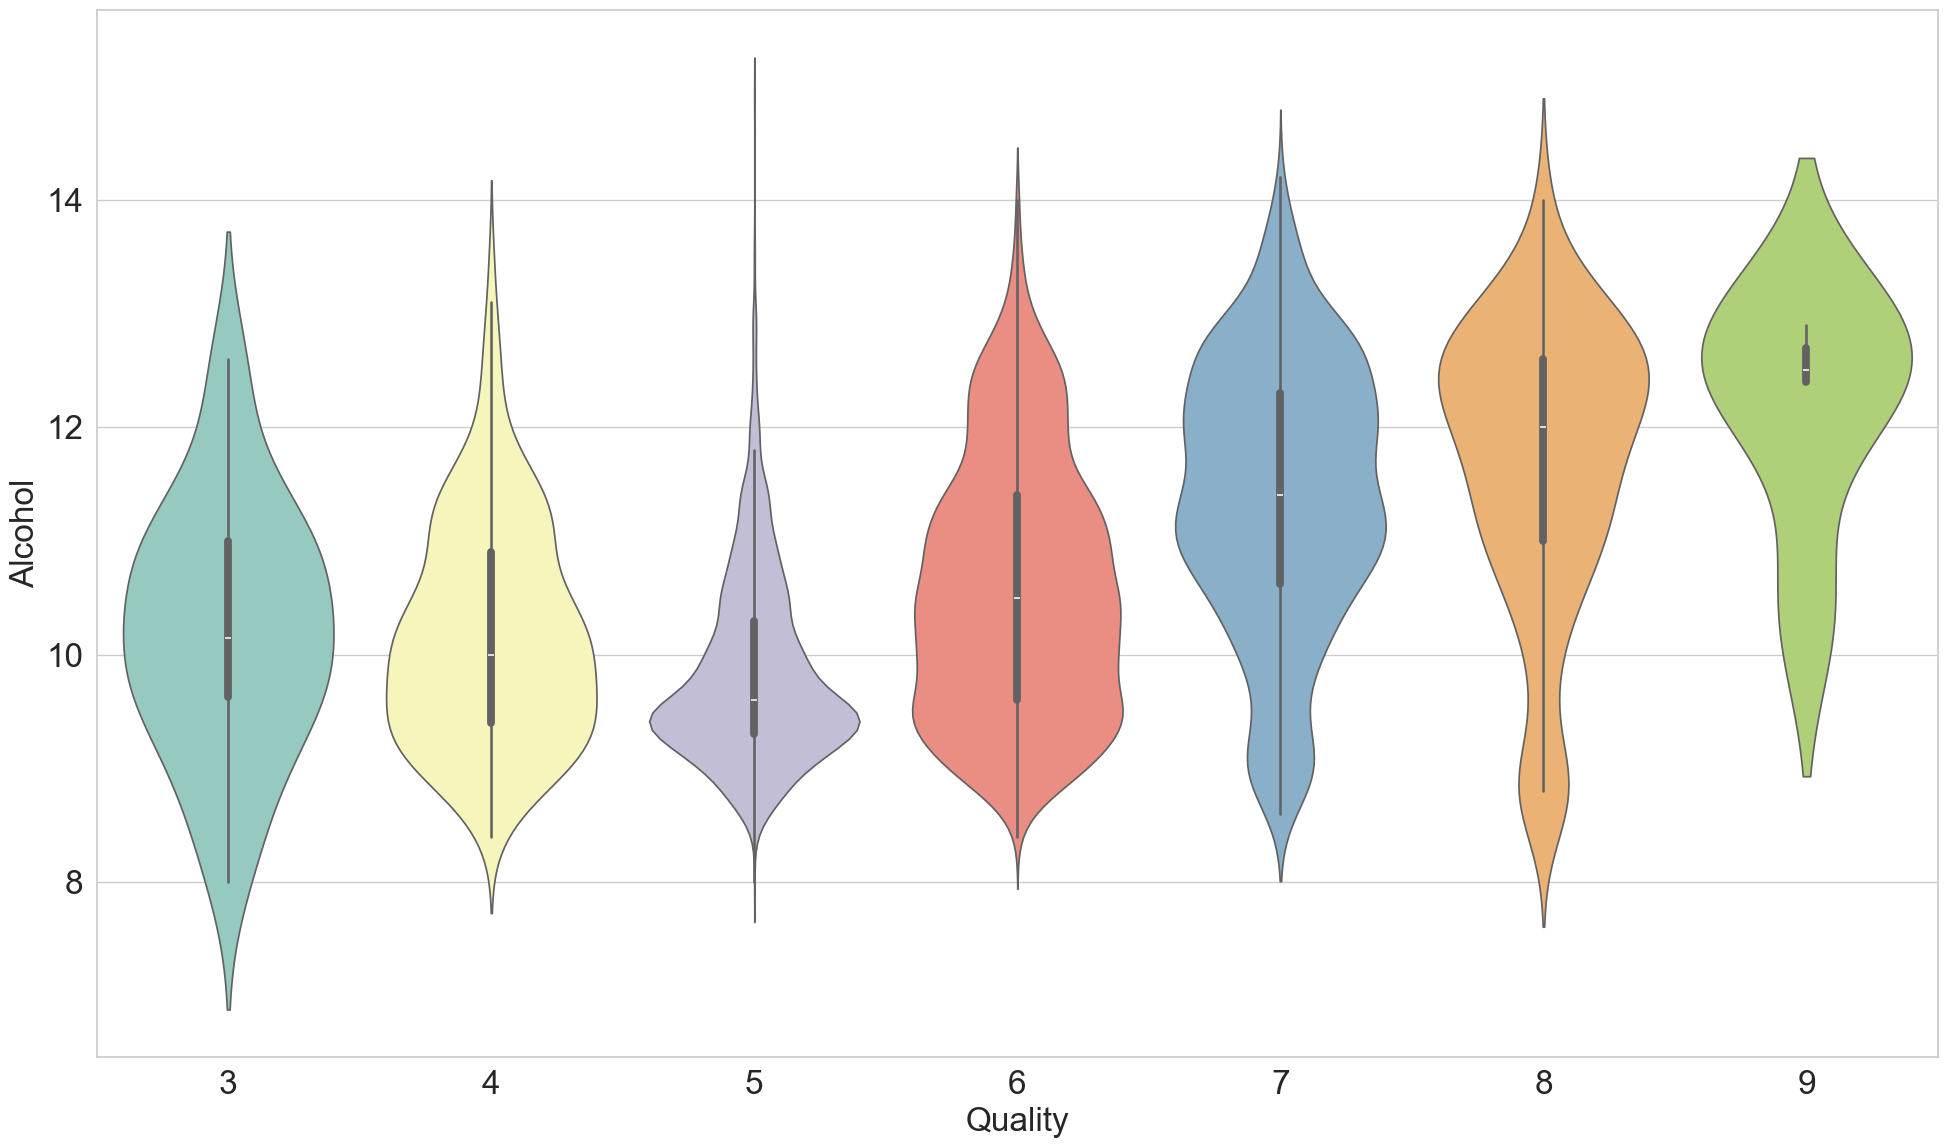

In [32]:
sns.violinplot(data=wine_df,
               x='quality', y='alcohol',
               palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.savefig('image_result/quality_alcohol_violinplot.png')

This is the end of Exploratory Data Analysis over here. 

Use some of the insights gained in this section and build some useful predictive models.

## Machine Learning Models

### Feature Selection

In [33]:
wine_df['good_quality'] = [1 if x >= 7 else 0 for x in wine_df['quality']]

In [34]:
X = wine_df.drop(['type', 'quality', 'good_quality'], axis=1)
y = wine_df['good_quality']

In [35]:
y.value_counts()

0    5220
1    1277
Name: good_quality, dtype: int64

### Split Dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

### Feature Importance

In [37]:
classifier = ExtraTreesClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8910769230769231

Coefficient of Determination is **0.888** which is a pretty score for the basic model that have built.

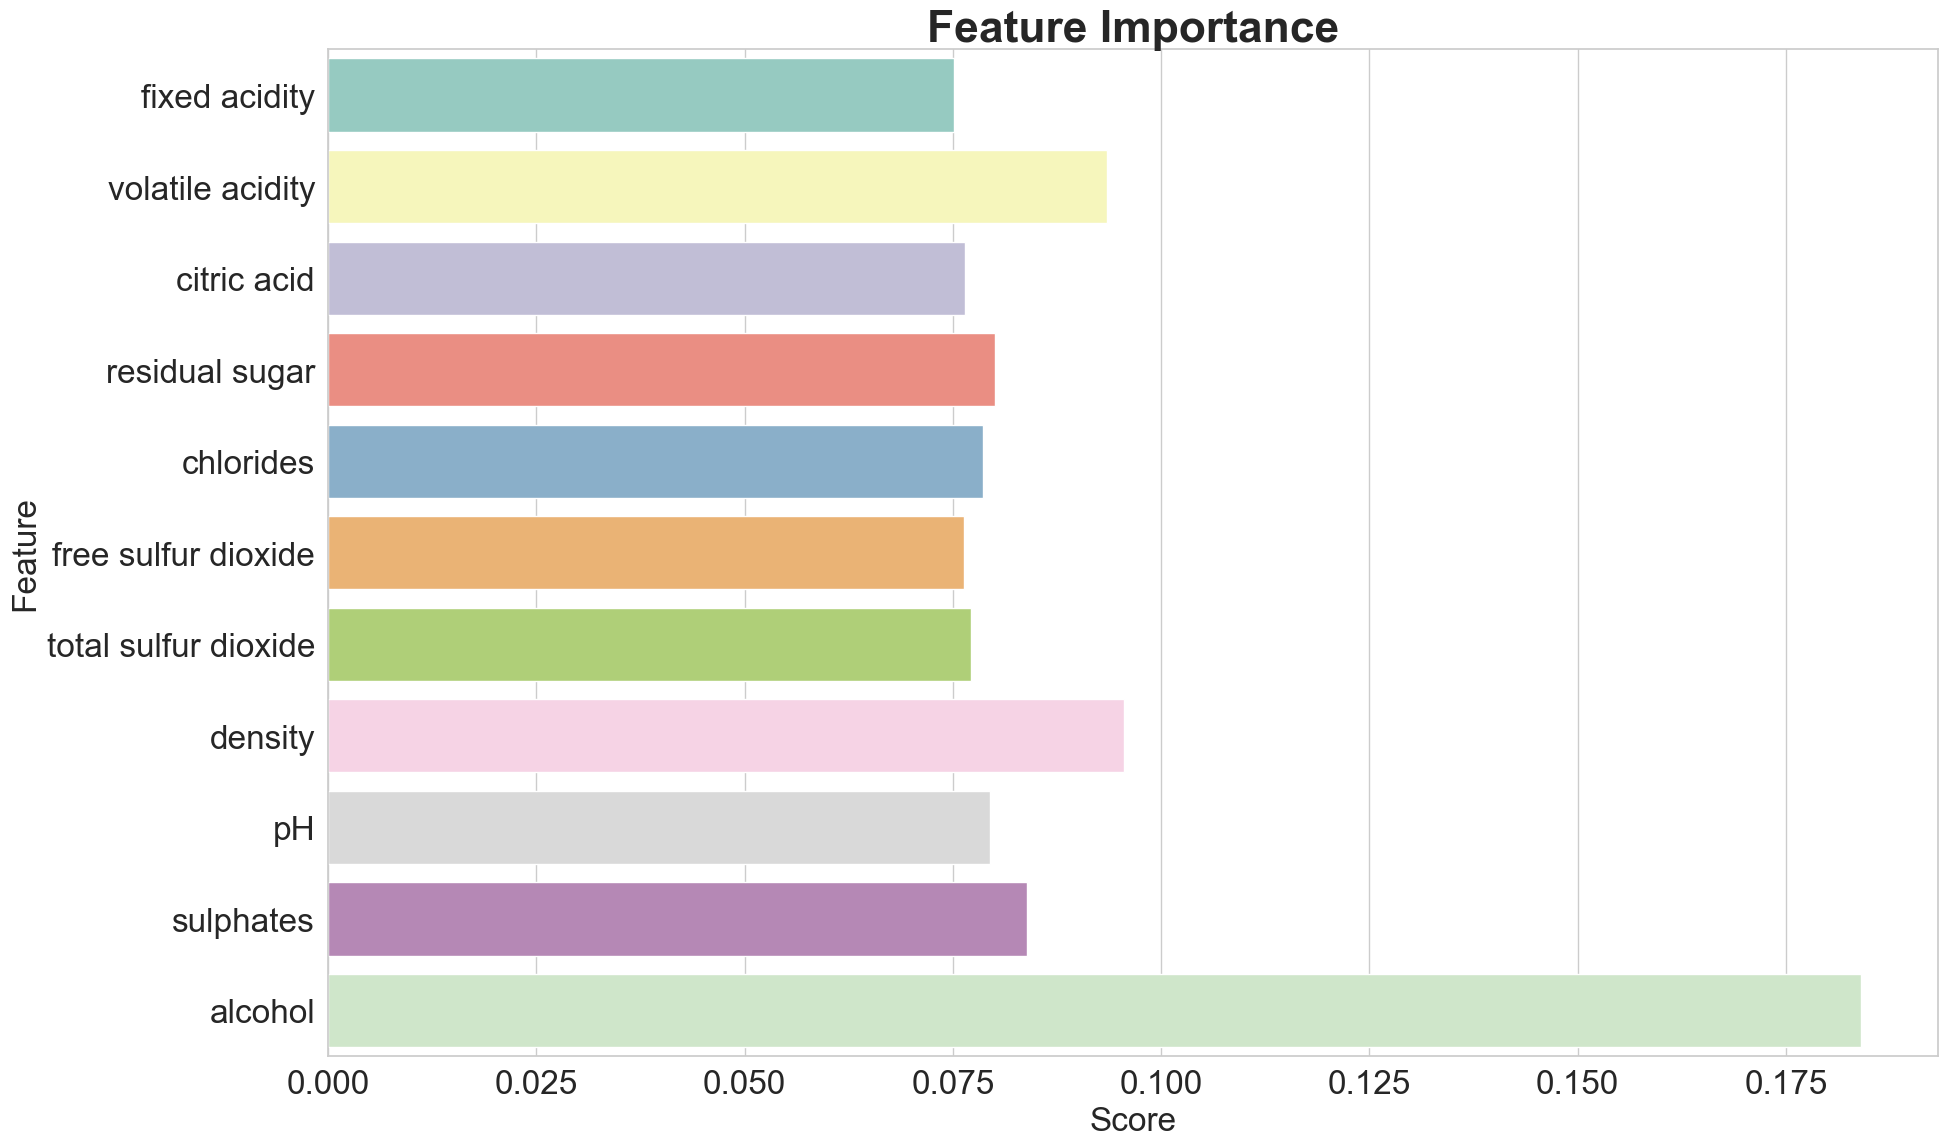

In [38]:
sns.barplot(x=classifier.feature_importances_, y=X.columns,
            palette='Set3')
plt.title('Feature Importance')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.savefig('image_result/classifier_model.png')

### Logistic Regression

In [39]:
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [40]:
reg_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', reg_score)

Accuracy Score: 0.8147692307692308


In [41]:
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Confussion Matrix:
 [[1260   57]
 [ 244   64]]


### KNN

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [43]:
knn_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', knn_score)

Accuracy Score: 0.8024615384615384


### Support Vector Machine SVC

In [44]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [45]:
svc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', svc_score)

Accuracy Score: 0.8104615384615385


### Decision Tree

In [46]:
des_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=7)
des_tree_model.fit(X_train, y_train)
y_pred = des_tree_model.predict(X_test)

In [47]:
des_tree_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', des_tree_score)

Accuracy Score: 0.84


### GaussianNB

In [48]:
gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)
y_pred = gauss_model.predict(X_test)

In [49]:
gauss_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', gauss_score)

Accuracy Score: 0.7692307692307693


### Random Forest

In [50]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [51]:
rf_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', rf_score)

Accuracy Score: 0.8836923076923077


### Xgboost

In [52]:
xgb_model = xgboost.XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [53]:
xgb_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', xgb_score)

Accuracy Score: 0.8732307692307693


### Gradient Boosting

In [54]:
grb_model = GradientBoostingClassifier()
grb_model.fit(X_train, y_train)
y_pred = grb_model.predict(X_test)

In [55]:
grb_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', grb_score)

Accuracy Score: 0.84


## Final Results

In [56]:
model = ['Logistic Regression', 'KNN Classifier',
         'SVC', 'Decision Tree Classifier',
         'GaussianNB', 'Random Forest Classifier',
         'Xgboost Classifier', 'Gradient Boosting Classifier']
score = [reg_score, knn_score, svc_score, des_tree_score,
         gauss_score, rf_score, xgb_score, grb_score]

results_df = pd.DataFrame({'Model': model, 'Score': score})
results_df.set_index('Model', inplace=True)
results_df.sort_values('Score', ascending=False, inplace=True)
results_df

Score
Model                                 
Random Forest Classifier      0.883692
Xgboost Classifier            0.873231
Decision Tree Classifier      0.840000
Gradient Boosting Classifier  0.840000
Logistic Regression           0.814769
SVC                           0.810462
KNN Classifier                0.802462
GaussianNB                    0.769231

Hence Random Forest Classifier will be used because it was the only ML model that gives the 88.4% accuracy which was considered as the best accuracy.

In [57]:
y_pred = list(rf_model.predict(X_test))
predicted_df = pd.DataFrame({'original_value': y_test, 'predicted_value': y_pred})

In [58]:
predicted_df.head(20)

original_value  predicted_value
3103               1                1
1419               1                0
4761               0                0
4690               0                0
4032               0                0
1297               1                0
1773               0                0
686                0                0
561                0                0
1048               0                0
1891               0                0
2264               0                0
1587               0                0
217                0                0
230                0                0
2168               1                1
1400               1                1
4355               0                0
4697               1                1
4295               0                0

### Save Machine Learning Model

In [59]:
file = 'wine_quality.sav'
save = pickle.dump(rf_model, open(file, 'wb'))

### Load Models from Disk

In [60]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.score(X_test, y_test)
result

0.8836923076923077